In [1]:
# importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import itertools
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProjectCompletedata.csv')
print(dataset)

       Province/State        Country/Region        Lat        Long      Date  \
0                 NaN           Afghanistan  33.939110   67.709953   1/22/20   
1                 NaN               Albania  41.153300   20.168300   1/22/20   
2                 NaN               Algeria  28.033900    1.659600   1/22/20   
3                 NaN               Andorra  42.506300    1.521800   1/22/20   
4                 NaN                Angola -11.202700   17.873900   1/22/20   
...               ...                   ...        ...         ...       ...   
307491            NaN    West Bank and Gaza  31.952200   35.233200  12/20/22   
307492            NaN  Winter Olympics 2022  39.904200  116.407400  12/20/22   
307493            NaN                 Yemen  15.552727   48.516388  12/20/22   
307494            NaN                Zambia -13.133897   27.849332  12/20/22   
307495            NaN              Zimbabwe -19.015438   29.154857  12/20/22   

        Confirmed  Deaths  Recovered  A

In [3]:
#Changing column names
dataset = dataset.rename(columns={"Province/State":"State","Country/Region": "Country"})
dataset["Date"] = pd.to_datetime(dataset["Date"])

In [4]:
dataset_UK = dataset.loc[dataset['Country'] == 'United Kingdom']
dataset_UK

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
264,Anguilla,United Kingdom,18.220600,-63.068600,2020-01-22,0,0,0,0
265,Bermuda,United Kingdom,32.307800,-64.750500,2020-01-22,0,0,0,0
266,British Virgin Islands,United Kingdom,18.420700,-64.640000,2020-01-22,0,0,0,0
267,Cayman Islands,United Kingdom,19.313300,-81.254600,2020-01-22,0,0,0,0
268,Channel Islands,United Kingdom,49.372300,-2.364400,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...,...,...
307481,Montserrat,United Kingdom,16.742498,-62.187366,2022-12-20,1403,8,0,1395
307482,Pitcairn Islands,United Kingdom,-24.376800,-128.324200,2022-12-20,4,0,0,4
307483,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,2022-12-20,2166,0,0,2166
307484,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,2022-12-20,6463,36,0,6427


In [5]:
#New Data set 
timeseries_df_UK = dataset_UK.filter(["Date",  "Confirmed", "Deaths", "Recovered", "Active"])
timeseries_df_UK = timeseries_df_UK.groupby(timeseries_df_UK["Date"]).sum()
timeseries_df_UK
# Select the proper time period for weekly aggreagation
timeseries_df_UK = timeseries_df_UK['2020-01-22':'2022-12-20'].resample('W').sum()
timeseries_df_UK

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-26,0,0,0,0
2020-02-02,6,5,0,1
2020-02-09,70,14,0,56
2020-02-16,116,14,12,90
2020-02-23,154,16,56,82
...,...,...,...,...
2022-11-27,169510564,1495103,0,168015461
2022-12-04,169681207,1496942,0,168184265
2022-12-11,169881760,1497228,0,168384532


#**CONFIRMED CASES**

Creating a line plot for the full time series of Confirmed Cases. Here plot() function form matplotlib package is used. Tried looking into the trend by plotting the original data alon with other line which is aggregated by the mean for monthly data. So we can find visualisation for line plot with two lines in it. 






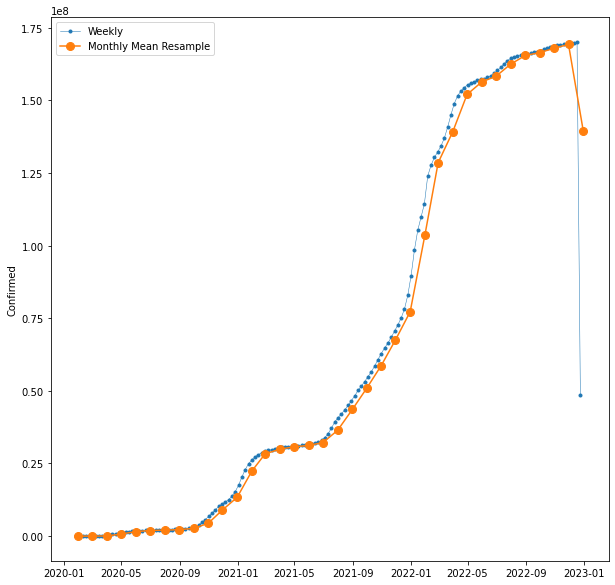

In [6]:
y = timeseries_df_UK['Confirmed']
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Confirmed')
ax.legend();

The line graph is plotted with Confirmed cases aggregatd for weekly and monthly along with date. If we look into the graph we can observe upward/downward trends in the data along with few anomalies. As there is no data included after December 20th, 2022 we can see a dip at the end of the line.

* Decomposition of the time series: 
The following properties will be observed from data decomposition.
*Trend: It can be seen as a slope with increase or decrease in the data.
* Sesonality: It is observed as patterns with a frequency which is affected by time period.
* Residuals: It is observed as the diffrence between obereved and predicted time series at each at a time t.



In [7]:
# graphs to show seasonal_decompose
def seasonal_decompose_func (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(8,8)
    plt.show()

Calling the function seasonal_decompose() which is created above by passing the time series as an input to the function.

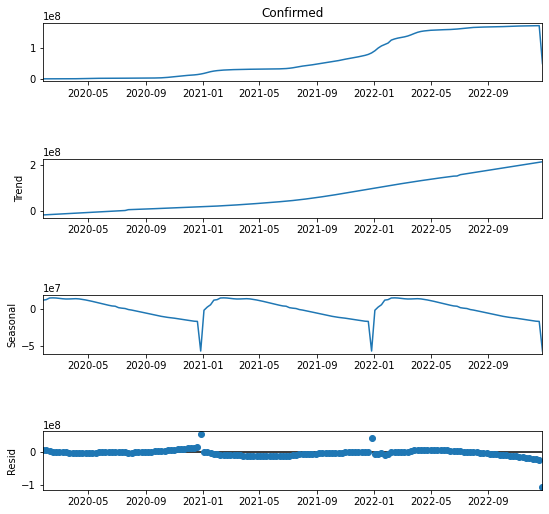

In [8]:
seasonal_decompose_func(y)

From the 4 graphs the first graph indicates the plotting of obserevd series and 2nd graph is for Trend, 3rd is for Sesionality and 4th is for Residuals. Additive model decomposition is chosen for this dataset.From the resultant trend graph it can be observed that there is an upward trend. Also in the sesonal graph we can observe that there is a sesonality for every start of the year.The residuals or the errors are also spread randomly in the Resid graph. By determing these properties of series will be helpful in choosing the time series models.

* **STATIONARITY CHECK**: 
The observations in a stationary time series are not dependent on time.
Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.
When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.


* Rolling statistics test: if time series data is required to be stationary the it should have a constant mean and variance. This indicates the mean and standard deviation or square root of variance are constant with increase in time. The rolling statistics is one of the visualisation method to visulaise the mean and standard deviation of the data.

In [9]:
### plot for Rolling Statistic for testing Stationarity
def stationarity_test(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std');
    plt.title("Rolling mean and standard deviation")
    ax.legend()

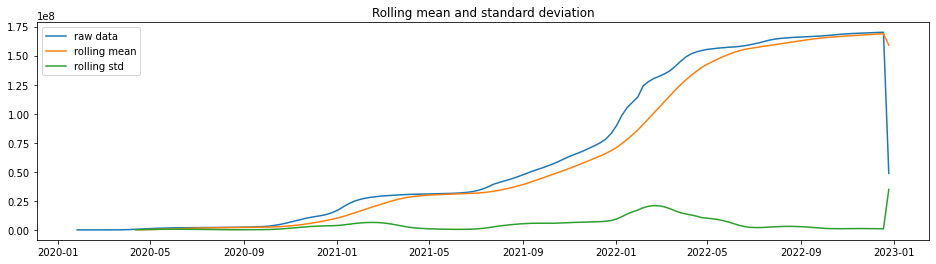

In [10]:
pd.options.display.float_format = '{:.8f}'.format
stationarity_test(y,'raw data')

After plotting the rolling statistics for the Time series data, from the resultant graph it can be observed as the rolling mean is incerasing with the increase in time and rolling standard deviation is constant with time. This indicates that the time series which we are analysing is not stationary.

* Augmented Dickey-Fuller Test:
The main reson behind conducting this test is to determing the stationarity. Here p-value <=0.05 then we can say that the null hypothesis is rejected and the data is stationary. If p-value >0.05 then it failed to reject the hypothesis and the data is not stationary.




In [11]:
# Augmented Dickey-Fuller Test
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [12]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -1.772
P-value = 0.394
Critical values :
	1%: -3.4744158894942156 - The data is not stationary with 99% confidence
	5%: -2.880878382771059 - The data is not stationary with 95% confidence
	10%: -2.577081275821236 - The data is not stationary with 90% confidence


From the output we can observe that the p-value > 0.05 and also the test statistic when compared to the critical values the test statistic value is greater. So the time series data which we used for analysis is not stationary.

* **Making the data stationary**

* Taking square root of the data: As the data for the confirmed cases are too large in numbers so taking square roo to those values.

In [13]:
df_sqrt=np.sqrt(timeseries_df_UK['Confirmed'])
df_diff=df_sqrt.diff().dropna()
print(df_diff)

Date
2020-02-02       2.44948974
2020-02-09       5.91711052
2020-02-16       2.40372935
2020-02-23       1.63934403
2020-03-01       6.45828862
                  ...      
2022-11-27       5.96382768
2022-12-04       6.55165228
2022-12-11       7.69580446
2022-12-18       8.99575802
2022-12-25   -6068.89186647
Freq: W-SUN, Name: Confirmed, Length: 152, dtype: float64


In [14]:
# Using drop() function to delete last row
df_diff.drop(index=df_diff.index[-1],axis=0,inplace=True)
print(df_diff)
y = df_diff

Date
2020-02-02   2.44948974
2020-02-09   5.91711052
2020-02-16   2.40372935
2020-02-23   1.63934403
2020-03-01   6.45828862
                ...    
2022-11-20   6.56841213
2022-11-27   5.96382768
2022-12-04   6.55165228
2022-12-11   7.69580446
2022-12-18   8.99575802
Freq: W-SUN, Name: Confirmed, Length: 151, dtype: float64


* Deseasonalising: It removes the underlying seasonaity from the time series. 

 > Is the de-seasonalized data stationary ?
Test statistic = -5.035
P-value = 0.000
Critical values :
	1%: -3.476597917537401 - The data is  stationary with 99% confidence
	5%: -2.8818291230495543 - The data is  stationary with 95% confidence
	10%: -2.5775887982253085 - The data is  stationary with 90% confidence


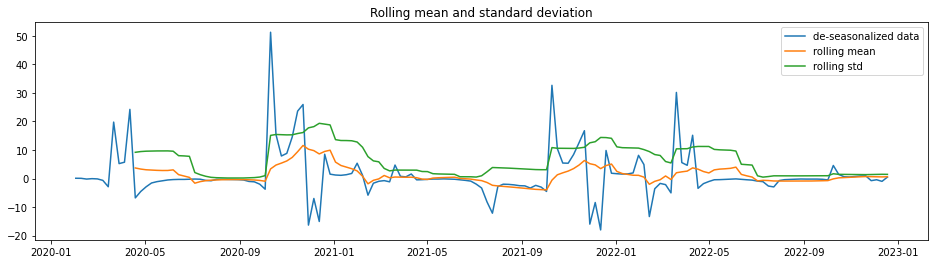

In [15]:
# Deseasonalize
result_add = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')
deseasonlize = y.values / result_add.seasonal
# rolling statistics test
stationarity_test(deseasonlize,'de-seasonalized data')
#ADF test
ADF_test(deseasonlize,'de-seasonalized data')

From the plots we can observe that the mean and standard deviation had become constant with time and the test statistic values are also greater than the critical calues. So we can conclude from this that the time series data had become stationary after removing the sesonal component

**ARIMA**:
ARIMA is an Auto Regressive Integrated Moving Average.
It is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values. ARIMA model accepts the non-sesasonal time series. So for this model we are removing the seasonality by taking the deseasonal time series which are computed above.

* Finding order of differencing(d) in ARIMA model: The purpose of differencing it to make the time series stationary.

But we need to be careful to not over-difference the series. Because, an over differenced series may still be non-stationary, which in turn will affect the model parameters.

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing.



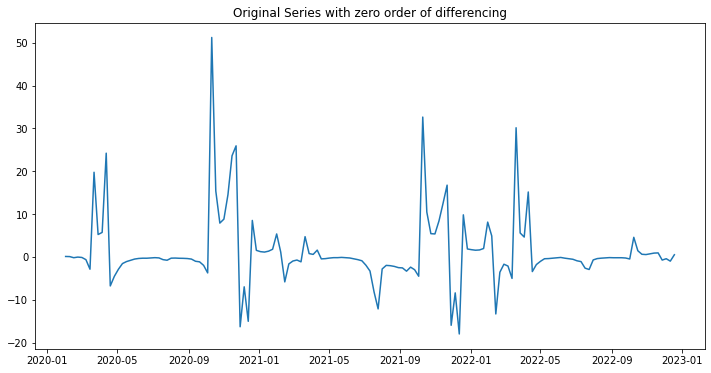

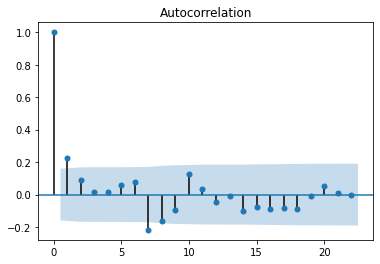

In [16]:
# Original Series
y_deseasonal = deseasonlize
plt.figure(figsize=(12, 6))
plt.plot(y_deseasonal)
plt.title('Original Series with zero order of differencing')
acf0 = plot_acf(y_deseasonal)

From the resultant plots we can observe that the ACF plot reaches to 0 at the zero order difference itself. So we are considering d value which is orderof diffrencing as d = 0 for this time series.

* Deternming AR(p)

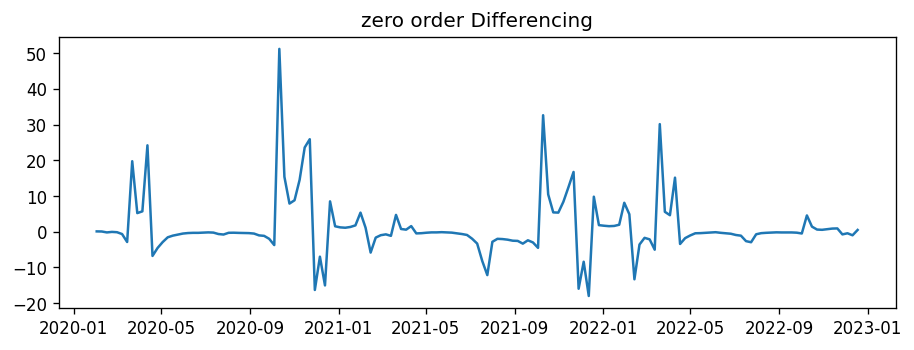

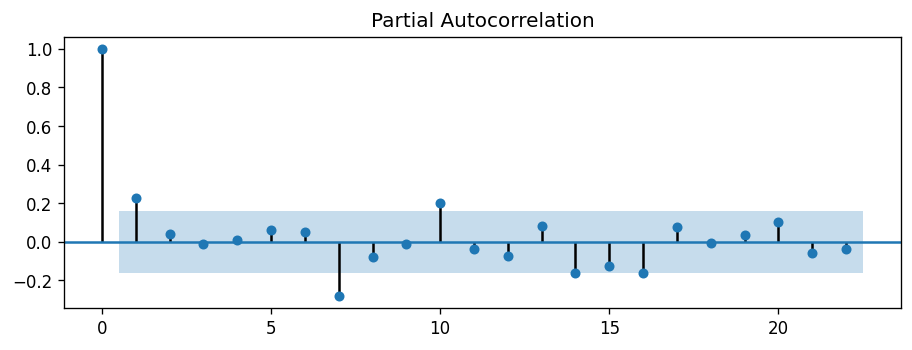

In [17]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plt.plot(y_deseasonal); 
plt.title('zero order Differencing')
pacf = plot_pacf(y_deseasonal.dropna())

* Determining MA(q)

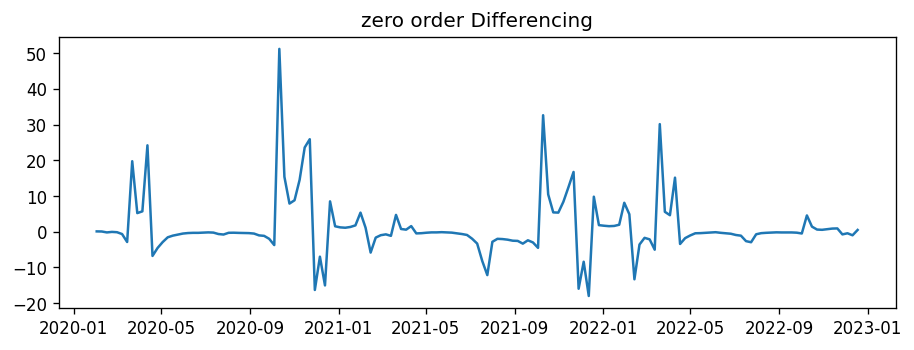

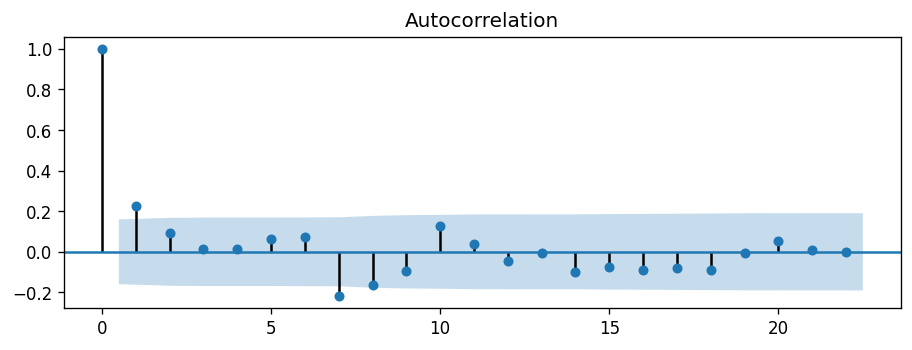

In [18]:
plt.plot(y_deseasonal); 
plt.title('zero order Differencing')
acf = plot_acf(y_deseasonal.dropna())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


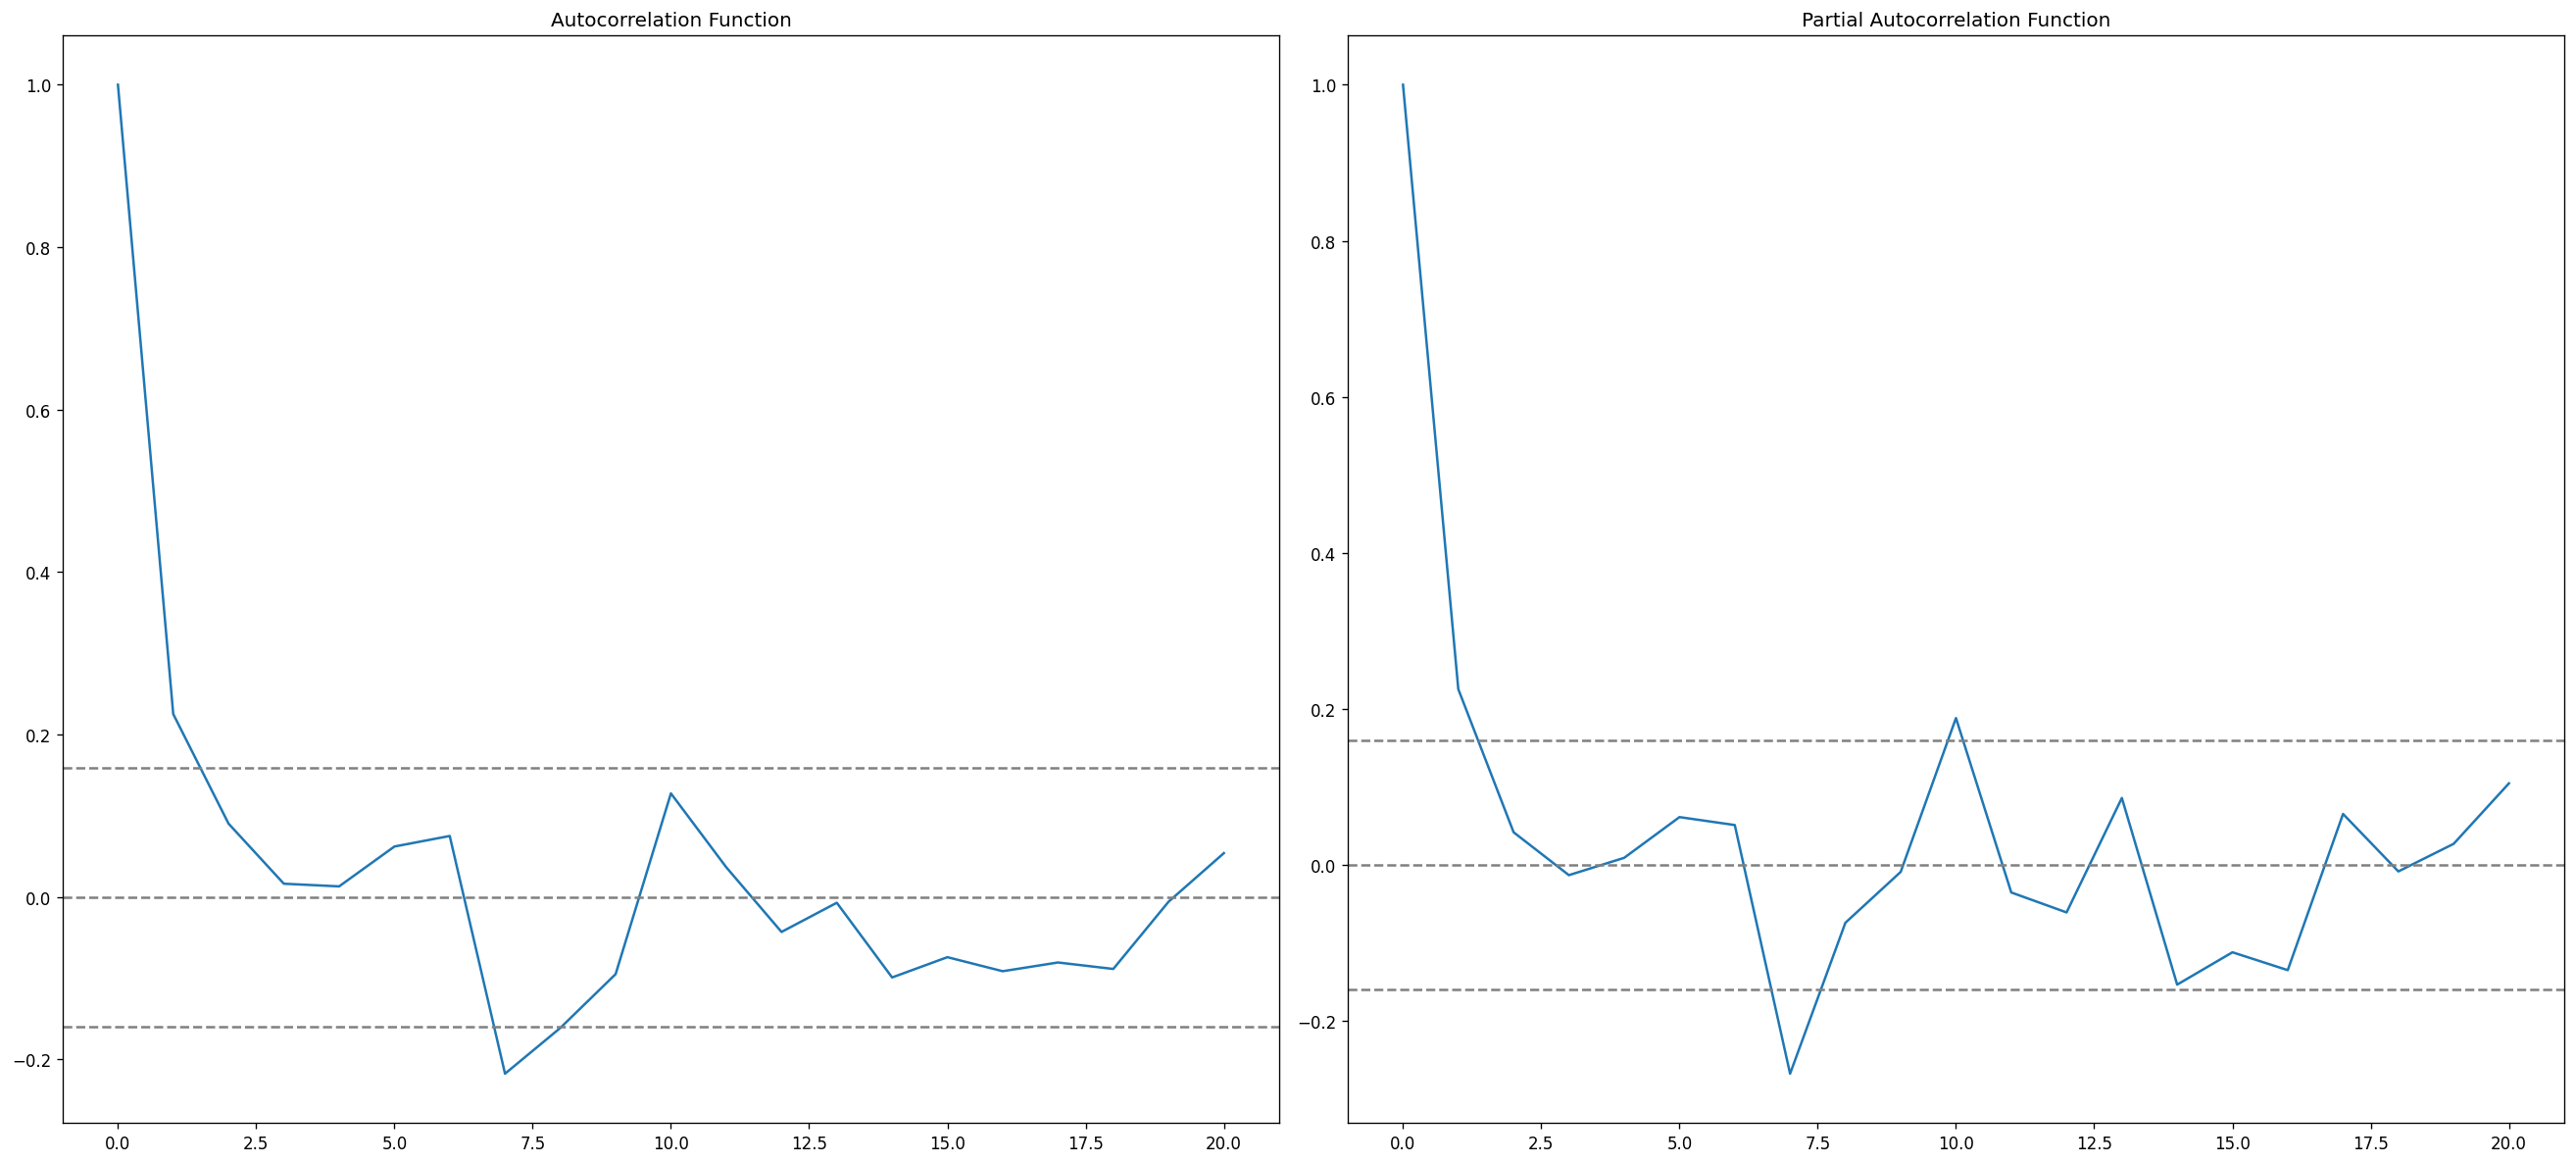

In [19]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(y_deseasonal, nlags=20)
lag_pacf = pacf(y_deseasonal, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_deseasonal)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_deseasonal)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_deseasonal)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_deseasonal)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values
Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time which is close to 2. p=2.
Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time which is close to 2. q=2.

In [20]:
model = ARIMA(y_deseasonal, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               seasonal   No. Observations:                  151
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -530.167
Date:                Tue, 17 Jan 2023   AIC                           1072.335
Time:                        07:45:32   BIC                           1090.439
Sample:                    02-02-2020   HQIC                          1079.690
                         - 12-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2520      1.571      0.797      0.426      -1.827       4.331
ar.L1          0.8359     34.454      0.024      0.981     -66.693      68.365
ar.L2         -0.1788     12.870     -0.014      0.9

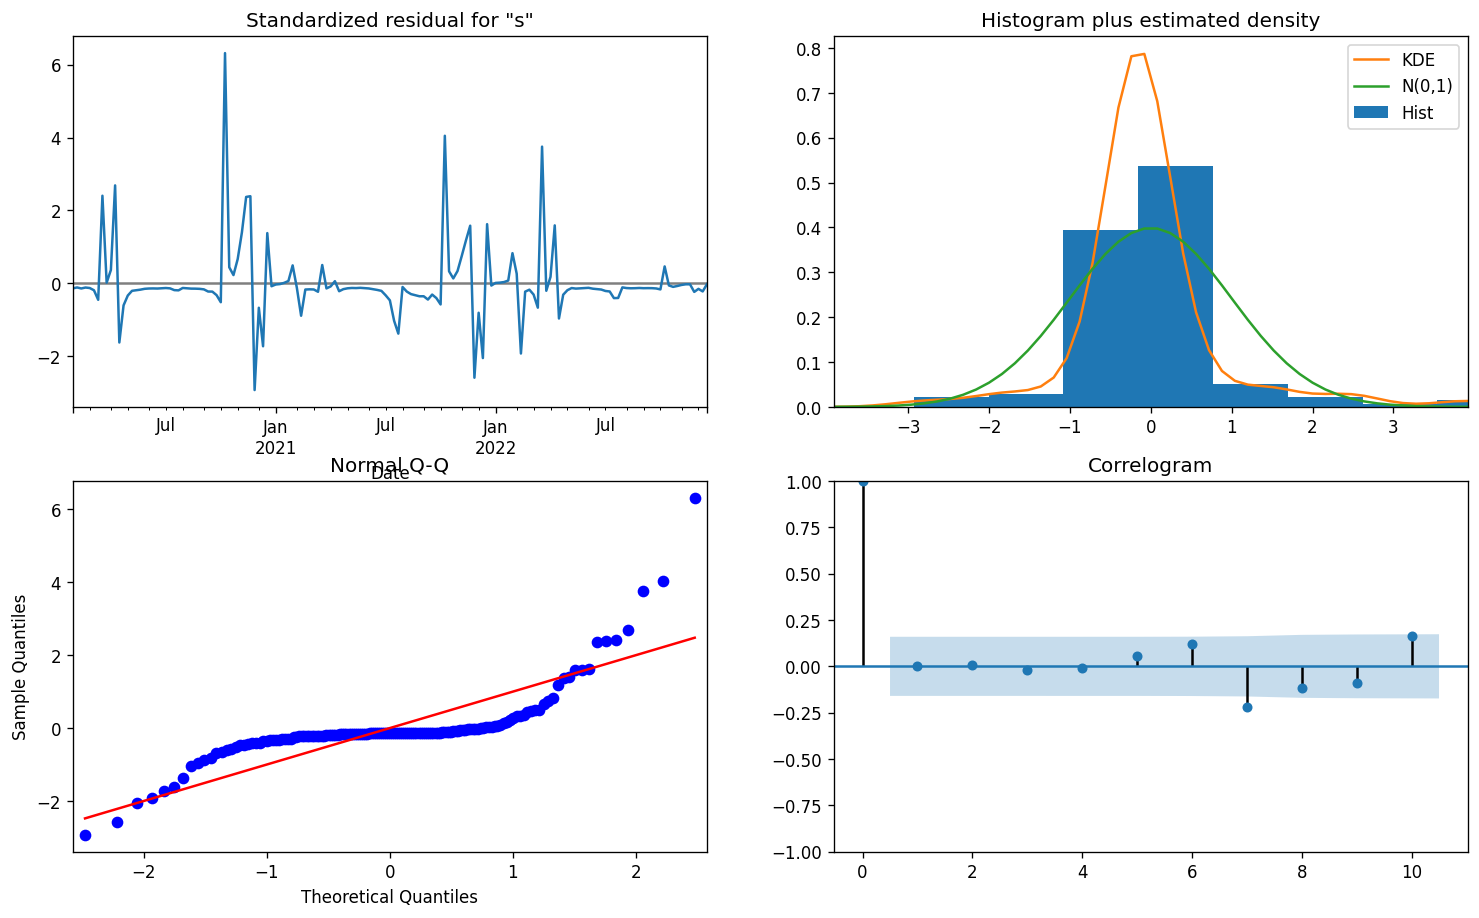

In [21]:
residuals_default = model_fit.plot_diagnostics(figsize=(15, 9))

* Future confirmed cases forecasting with ARIMA model

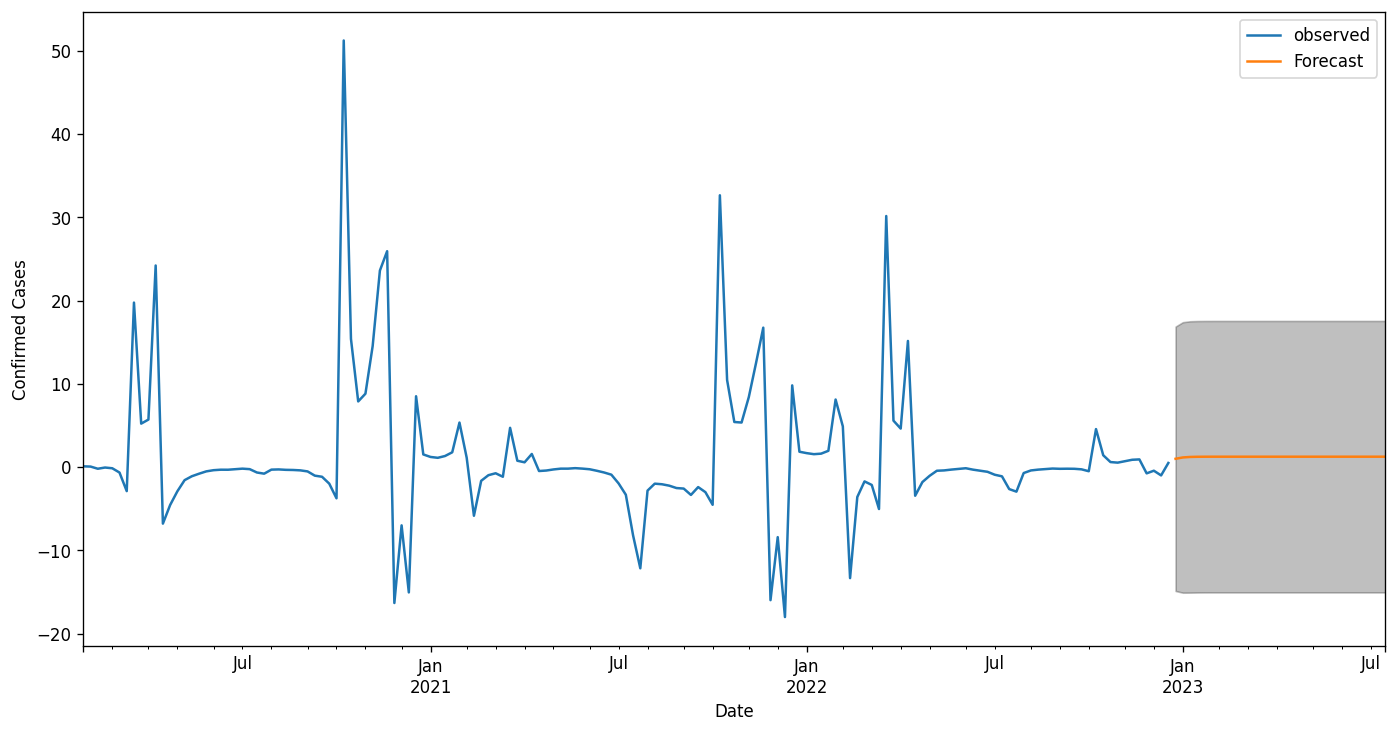

In [22]:
pred_uc = model_fit.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y_deseasonal.loc['2020-02-02':][:].plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [23]:
# Produce the forcasted tables 
pm = pred_uc.predicted_mean.reset_index()
pm.columns = ['Date','Predicted_Mean']
pci = pred_ci.reset_index()
pci.columns = ['Date','Lower Bound','Upper Bound']
final_table = pm.join(pci.set_index('Date'), on='Date')
final_table

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-12-25,1.00136376,-14.87482334,16.87755085
1,2023-01-01,1.16117768,-15.07939630,17.40175166
2,2023-01-08,1.22092490,-15.07197484,17.51382464
3,2023-01-15,1.24228324,-15.05764895,17.54221543
4,2023-01-22,1.24945031,-15.05133558,17.55023620
5,2023-01-29,1.25162114,-15.04925360,17.55249588
6,2023-02-05,1.25215385,-15.04872793,17.55303563
7,2023-02-12,1.25221087,-15.04867119,17.55309293
8,2023-02-19,1.25216326,-15.04871880,17.55304533
9,2023-02-26,1.25211327,-15.04876881,17.55299535


#**DEATH CASES**

Creating a line plot for the full time series of Death Cases. Here plot() function form matplotlib package is used. Tried looking into the trend by plotting the original data alon with other line which is aggregated by the mean for monthly data. So we can find visualisation for line plot with two lines in it. 






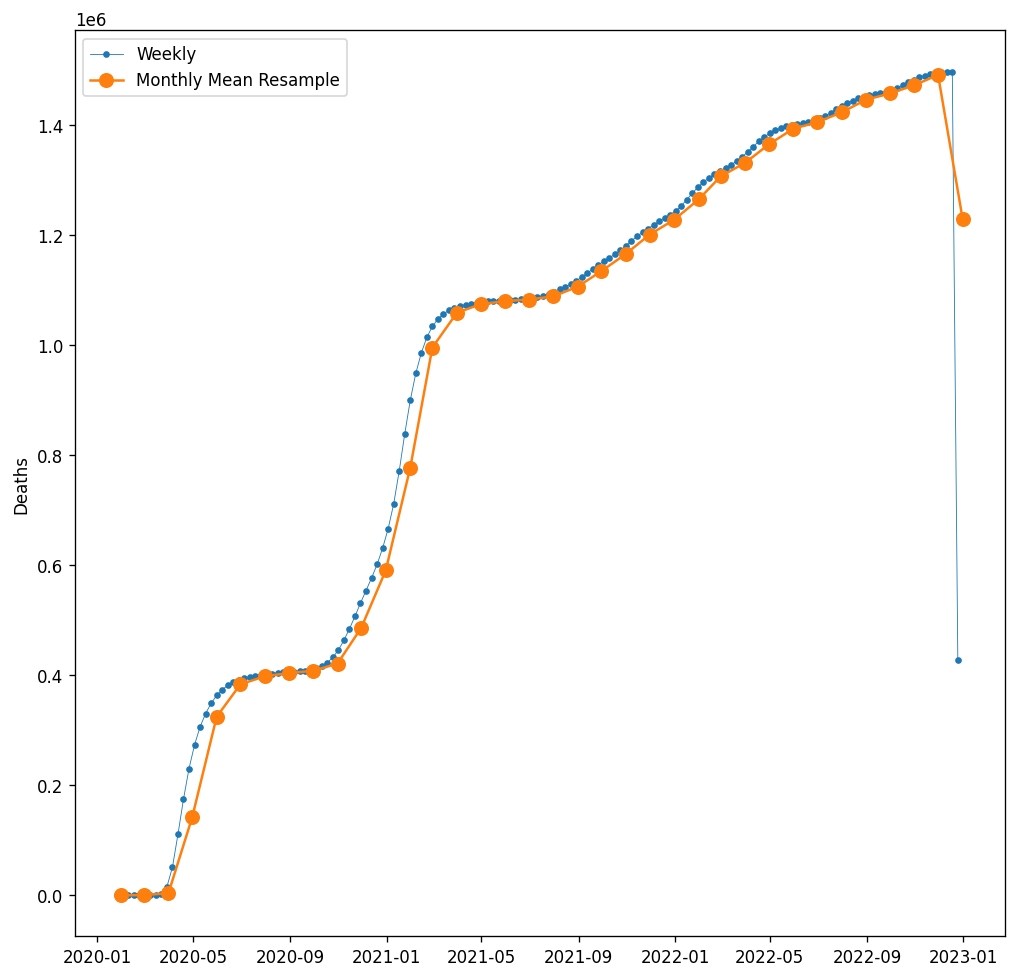

In [24]:
y = timeseries_df_UK['Deaths']
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Deaths')
ax.legend();

The line graph is plotted with Death cases aggregatd for weekly and monthly along with date. If we look into the graph we can observe upward/downward trends in the data along with few anomalies. As there is no data included after December 20th, 2022 we can see a dip at the end of the line.

* Decomposition of the time series: 
The following properties will be observed from data decomposition.
*Trend: It can be seen as a slope with increase or decrease in the data.
* Sesonality: It is observed as patterns with a frequency which is affected by time period.
* Residuals: It is observed as the diffrence between obereved and predicted time series at each at a time t.



In [25]:
# graphs to show seasonal_decompose
def seasonal_decompose_func (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(8,8)
    plt.show()

Calling the function seasonal_decompose() which is created above by passing the time series as an input to the function.

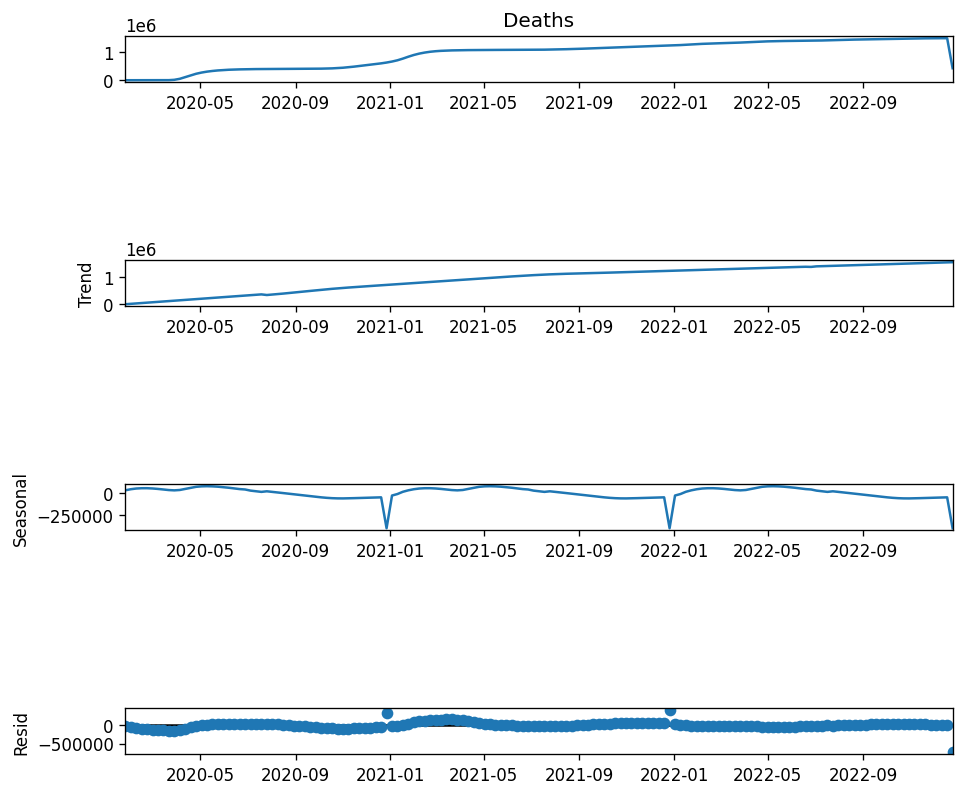

In [26]:
seasonal_decompose_func(y)

From the 4 graphs the first graph indicates the plotting of obserevd series and 2nd graph is for Trend, 3rd is for Sesionality and 4th is for Residuals. Additive model decomposition is chosen for this dataset.From the resultant trend graph it can be observed that there is an upward trend. Also in the sesonal graph we can observe that there is a sesonality for every start of the year.The residuals or the errors are also spread randomly in the Resid graph. By determing these properties of series will be helpful in choosing the time series models.

* **STATIONARITY CHECK**: 
The observations in a stationary time series are not dependent on time.
Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.
When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.


* Rolling statistics test: if time series data is required to be stationary the it should have a constant mean and variance. This indicates the mean and standard deviation or square root of variance are constant with increase in time. The rolling statistics is one of the visualisation method to visulaise the mean and standard deviation of the data.

In [27]:
### plot for Rolling Statistic for testing Stationarity
def stationarity_test(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std');
    plt.title("Rolling mean and standard deviation")
    ax.legend()

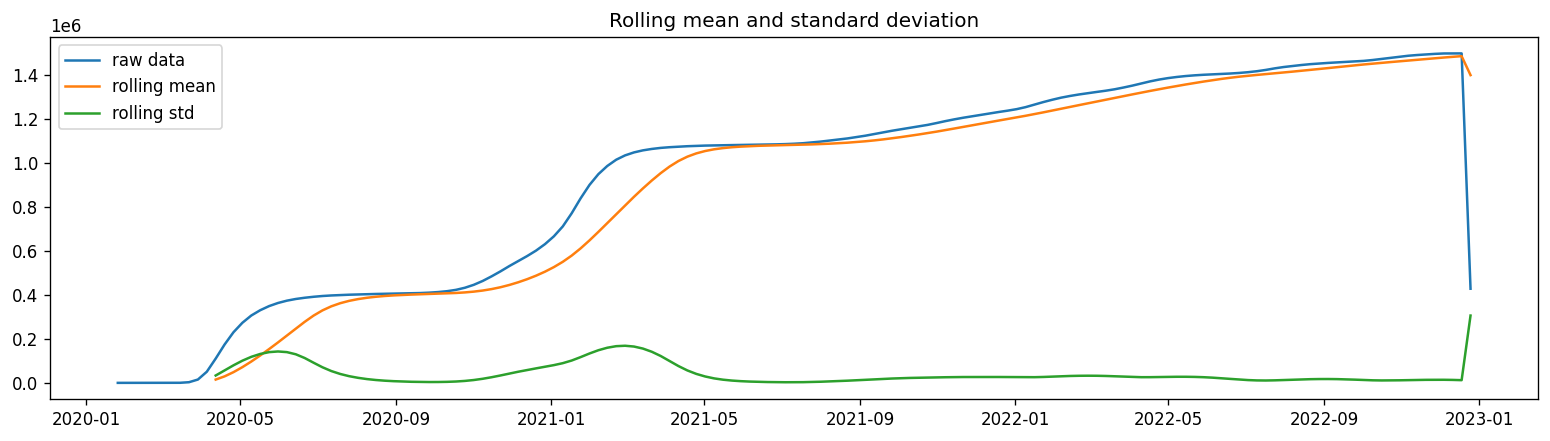

In [28]:
pd.options.display.float_format = '{:.8f}'.format
stationarity_test(y,'raw data')

After plotting the rolling statistics for the Time series data, from the resultant graph it can be observed as the rolling mean is incerasing with the increase in time and rolling standard deviation is constant with time. This indicates that the time series which we are analysing is not stationary.

* Augmented Dickey-Fuller Test:
The main reson behind conducting this test is to determing the stationarity. Here p-value <=0.05 then we can say that the null hypothesis is rejected and the data is stationary. If p-value >0.05 then it failed to reject the hypothesis and the data is not stationary.




In [29]:
# Augmented Dickey-Fuller Test
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [30]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -1.141
P-value = 0.699
Critical values :
	1%: -3.4744158894942156 - The data is not stationary with 99% confidence
	5%: -2.880878382771059 - The data is not stationary with 95% confidence
	10%: -2.577081275821236 - The data is not stationary with 90% confidence


From the output we can observe that the p-value > 0.05 and also the test statistic when compared to the critical values the test statistic value is greater. So the time series data which we used for analysis is not stationary.

* **Making the data stationary**

* Taking square root of the data: As the data for the death cases are too large in numbers so taking square roo to those values.

In [31]:
df_log=np.sqrt(timeseries_df_UK['Deaths'])
df_diff=df_log.diff().dropna()
print(df_diff)

Date
2020-02-02      2.23606798
2020-02-09      1.50558941
2020-02-16      0.00000000
2020-02-23      0.25834261
2020-03-01      0.58257569
                  ...     
2022-11-27      1.01985371
2022-12-04      0.75176602
2022-12-11      0.11687263
2022-12-18      0.00326900
2022-12-25   -569.56396712
Freq: W-SUN, Name: Deaths, Length: 152, dtype: float64


In [32]:
# Using drop() function to delete last row
df_diff.drop(index=df_diff.index[-1],axis=0,inplace=True)
print(df_diff)
y = df_diff

Date
2020-02-02   2.23606798
2020-02-09   1.50558941
2020-02-16   0.00000000
2020-02-23   0.25834261
2020-03-01   0.58257569
                ...    
2022-11-20   1.11983296
2022-11-27   1.01985371
2022-12-04   0.75176602
2022-12-11   0.11687263
2022-12-18   0.00326900
Freq: W-SUN, Name: Deaths, Length: 151, dtype: float64


* Deseasonalising: It removes the underlying seasonaity from the time series. 

 > Is the de-seasonalized data stationary ?
Test statistic = -11.712
P-value = 0.000
Critical values :
	1%: -3.474714913481481 - The data is  stationary with 99% confidence
	5%: -2.881008708148148 - The data is  stationary with 95% confidence
	10%: -2.5771508444444446 - The data is  stationary with 90% confidence


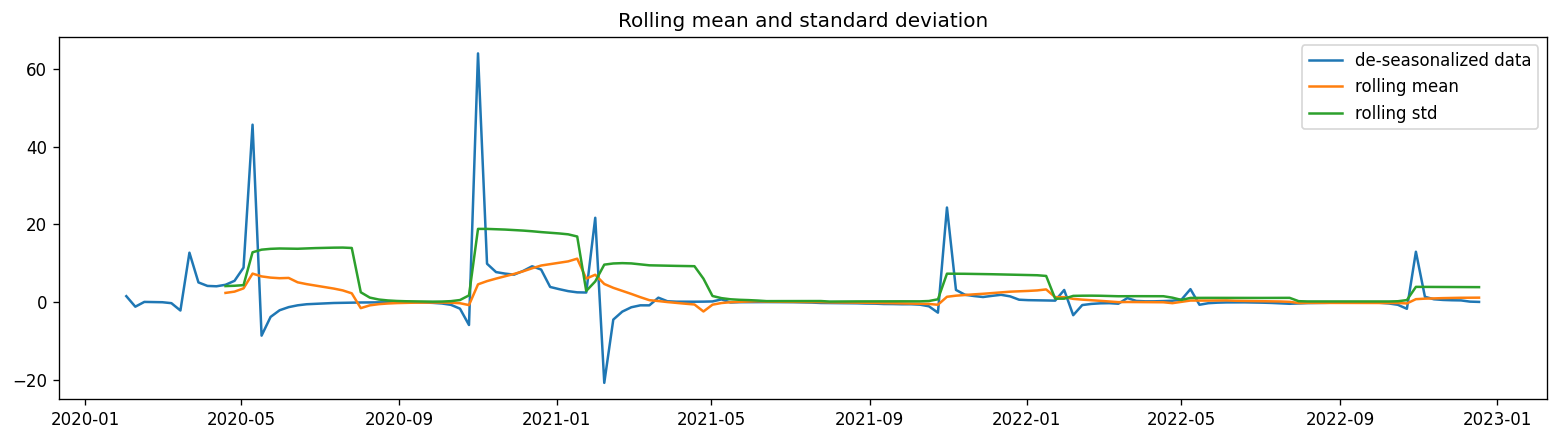

In [33]:
# Deseasonalize
result_add = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')
deseasonlize = y.values / result_add.seasonal
# rolling statistics test
stationarity_test(deseasonlize,'de-seasonalized data')
#ADF test
ADF_test(deseasonlize,'de-seasonalized data')

From the plots we can observe that the mean and standard deviation had become constant with time and the test statistic values are also greater than the critical calues. So we can conclude from this that the time series data had become stationary after removing the sesonal component

* SARIMA

* p,d,q

In [34]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [35]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [36]:
# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [37]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


* Grid Search

In [38]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
results_params = []
results_aic = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            results_params.append(str(param) +'x'+ str(param_seasonal))
            results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1305.1222907836332
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1005.9601599857181
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1218.6002609916873
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:947.7749707563702
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1059.636696431688
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1007.7573774007708
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:982.175935699422
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:923.8460111102004
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1102.3267171312716
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:805.2797438655214
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1029.0580827260858
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:759.9097258169927
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:899.1656865717516
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:806.7682994678669
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:808.6039739453862
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:778.0088129079287
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:946.6297005890256
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:604.5554268259662
ARIMA

In [39]:
results_params_aic = zip(results_params, results_aic)
results_params_aic

In [40]:
# Sort the feature importances by most important first
results_params_aic = sorted(results_params_aic, key = lambda x: x[1], reverse = False)
results_params_aic[:5]

[('(1, 1, 1)x(0, 0, 1, 12)', 332.14964955518997),
 ('(1, 1, 1)x(1, 0, 1, 12)', 334.0594594744988),
 ('(1, 1, 1)x(1, 0, 0, 12)', 335.8040126503894),
 ('(1, 1, 1)x(1, 1, 1, 12)', 355.71401418010817),
 ('(1, 1, 1)x(1, 1, 0, 12)', 381.09176178221026)]

* SARIMA

In [41]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
mod_default = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0 , 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_default = mod_default.fit()

In [42]:
print(results_default.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Deaths   No. Observations:                  151
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -162.075
Date:                            Tue, 17 Jan 2023   AIC                            332.150
Time:                                    07:45:48   BIC                            343.800
Sample:                                02-02-2020   HQIC                           336.884
                                     - 12-18-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6456      0.034     19.036      0.000       0.579       0.712
ma.L1          0.6286      0.046   

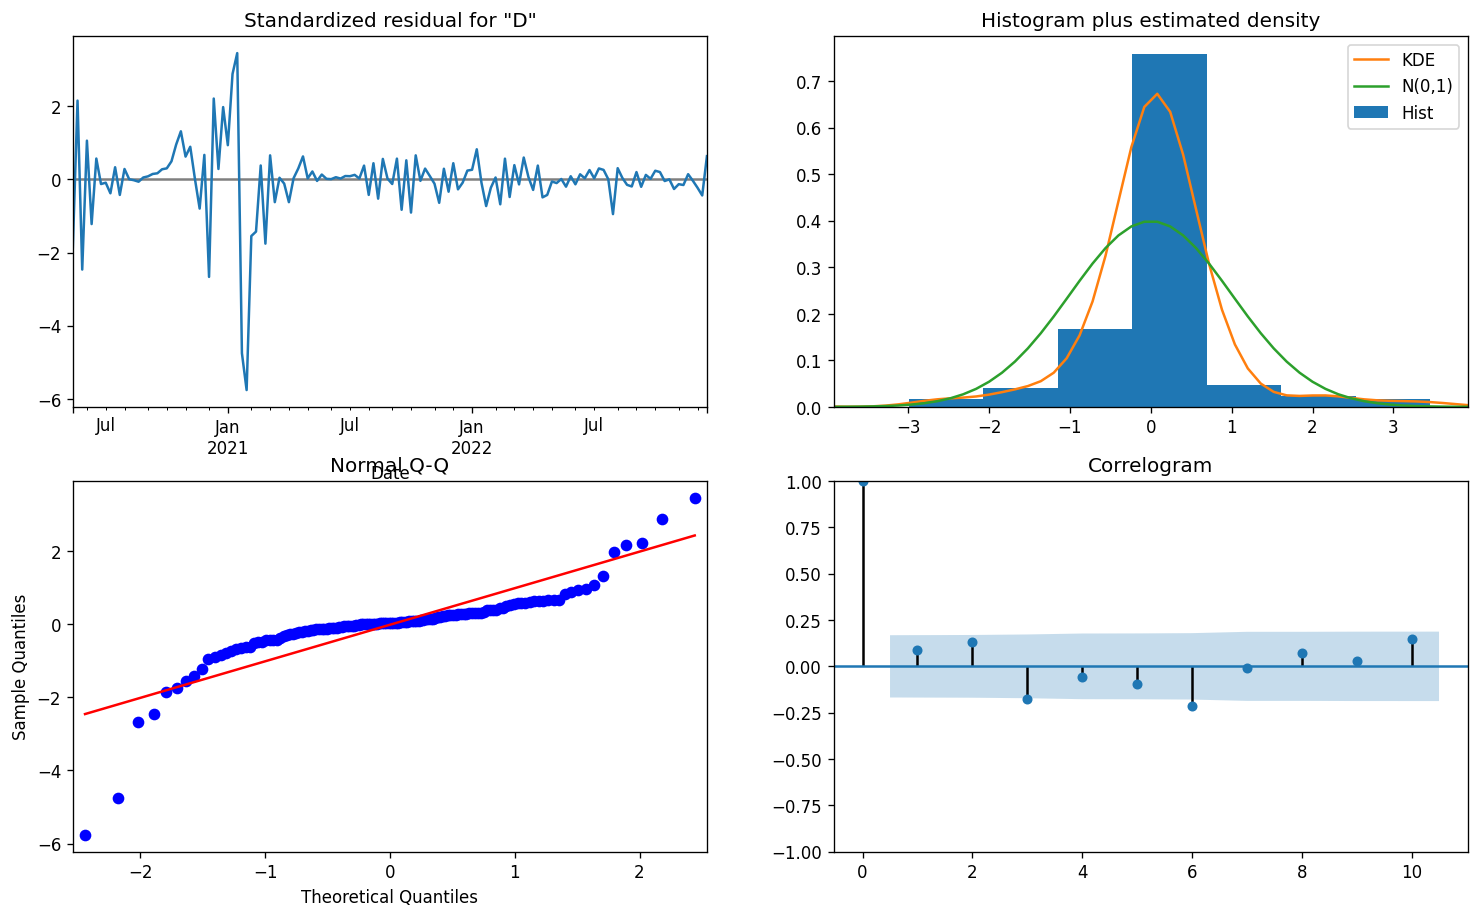

In [43]:
residuals_default = results_default.plot_diagnostics(figsize=(15, 9))

* Forecasting with the model

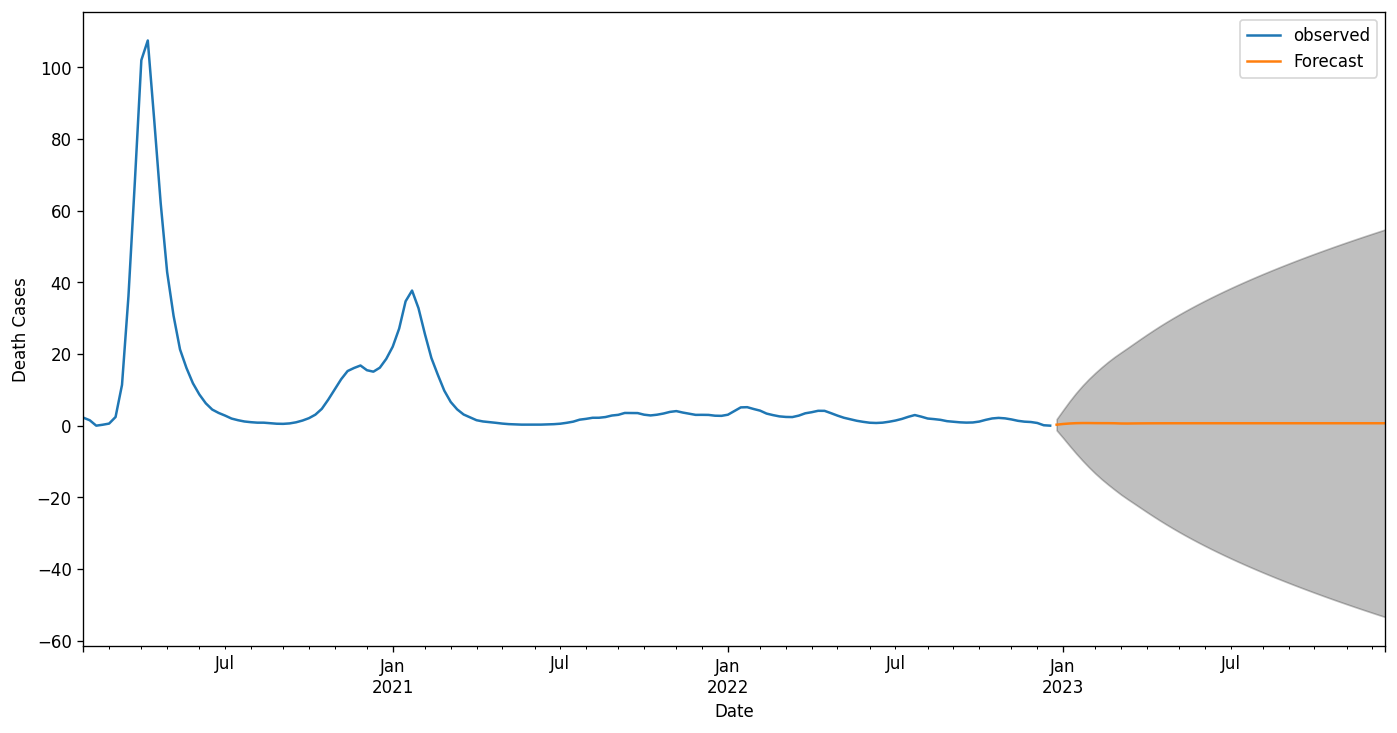

In [44]:
pred_uc = results_default.get_forecast(steps=52)
pred_ci = pred_uc.conf_int()
ax = y.loc['2020-02-02':][:].plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Death Cases')
plt.legend()
plt.show()

In [45]:
# Produce the forcasted tables 
pm = pred_uc.predicted_mean.reset_index()
pm.columns = ['Date','Predicted_Mean']
pci = pred_ci.reset_index()
pci.columns = ['Date','Lower Bound','Upper Bound']
final_table = pm.join(pci.set_index('Date'), on='Date')
final_table

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-12-25,0.26951373,-1.29041670,1.82944415
1,2023-01-01,0.47068720,-3.40468623,4.34606063
2,2023-01-08,0.60753571,-5.58558047,6.80065190
3,2023-01-15,0.69390296,-7.69543503,9.08324094
4,2023-01-22,0.72813600,-9.70003287,11.15630486
5,2023-01-29,0.72585896,-11.58304006,13.03475798
6,2023-02-05,0.70500497,-13.33908086,14.74909080
7,2023-02-12,0.69558778,-14.95467475,16.34585030
8,2023-02-19,0.69421805,-16.44978924,17.83822535
9,2023-02-26,0.67269473,-17.86770626,19.21309572


#**ACTIVE CASES**

Creating a line plot for the full time series of Active Cases. Here plot() function form matplotlib package is used. Tried looking into the trend by plotting the original data alon with other line which is aggregated by the mean for monthly data. So we can find visualisation for line plot with two lines in it. 






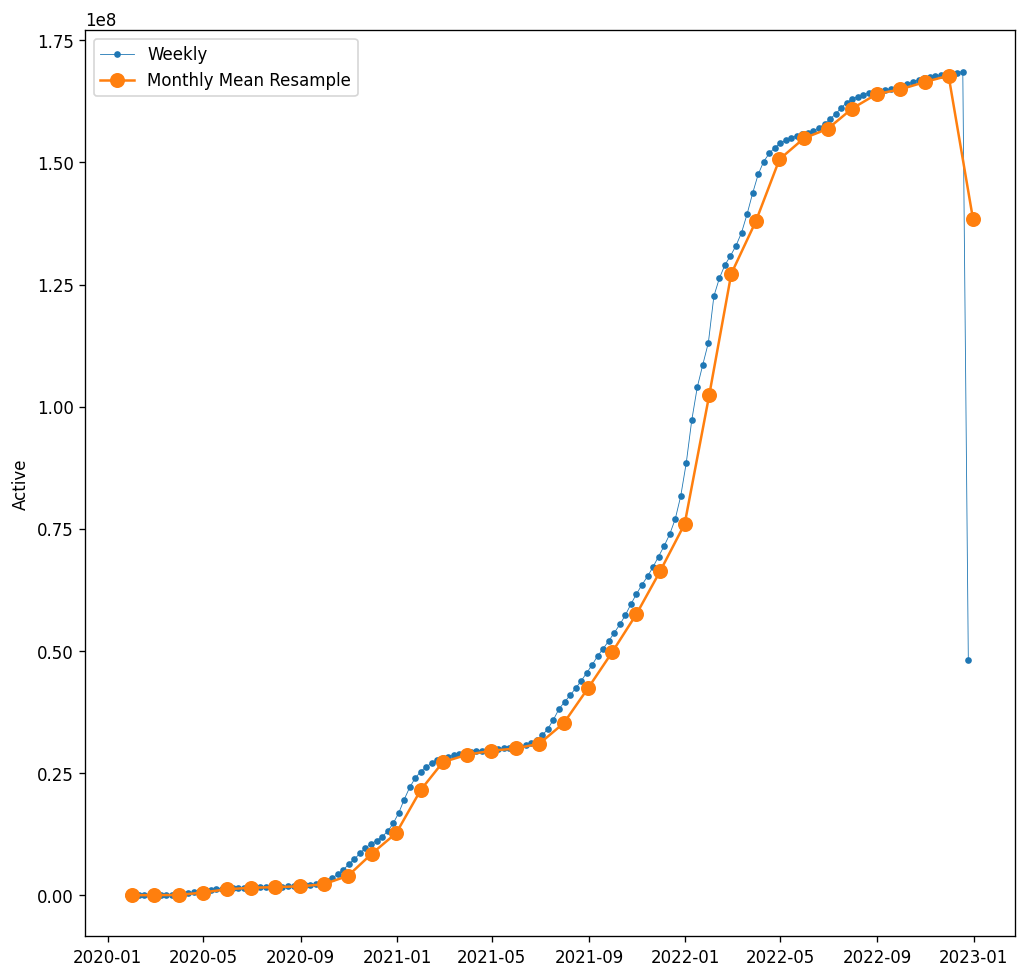

In [46]:
y = timeseries_df_UK['Active']
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Active')
ax.legend();

The line graph is plotted with Active cases aggregatd for weekly and monthly along with date. If we look into the graph we can observe upward/downward trends in the data along with few anomalies. As there is no data included after December 20th, 2022 we can see a dip at the end of the line.

* Decomposition of the time series: 
The following properties will be observed from data decomposition.
*Trend: It can be seen as a slope with increase or decrease in the data.
* Sesonality: It is observed as patterns with a frequency which is affected by time period.
* Residuals: It is observed as the diffrence between obereved and predicted time series at each at a time t.



In [47]:
# graphs to show seasonal_decompose
def seasonal_decompose_func (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(8,8)
    plt.show()

Calling the function seasonal_decompose() which is created above by passing the time series as an input to the function.

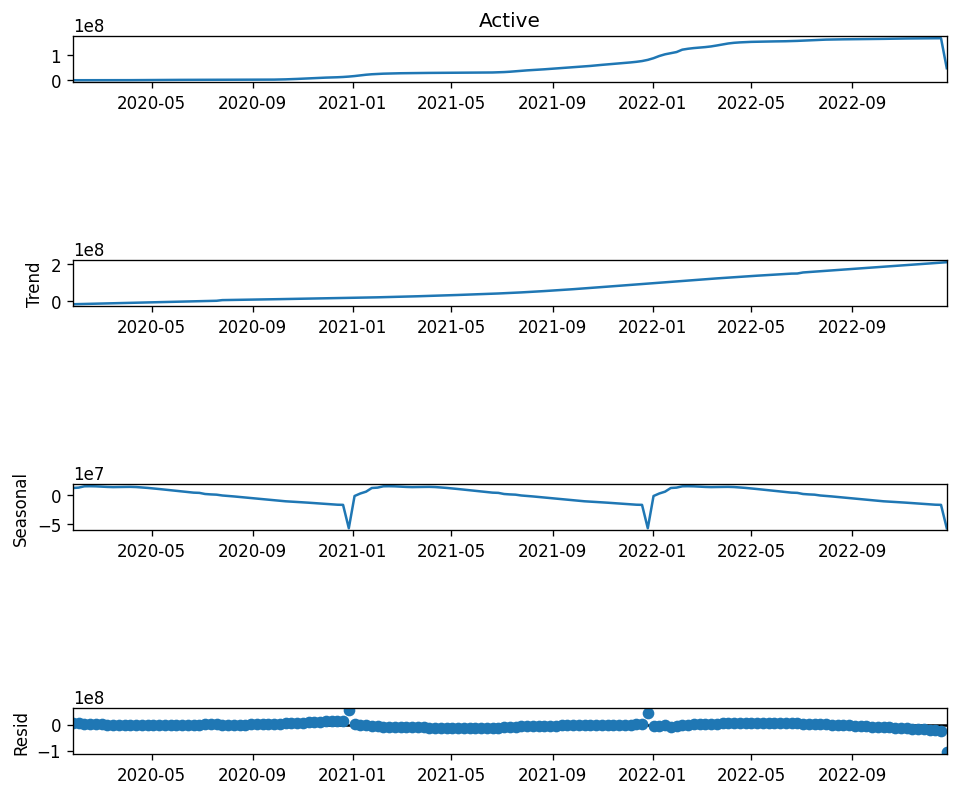

In [48]:
seasonal_decompose_func(y)

From the 4 graphs the first graph indicates the plotting of obserevd series and 2nd graph is for Trend, 3rd is for Sesionality and 4th is for Residuals. Additive model decomposition is chosen for this dataset.From the resultant trend graph it can be observed that there is an upward trend. Also in the sesonal graph we can observe that there is a sesonality for every start of the year.The residuals or the errors are also spread randomly in the Resid graph. By determing these properties of series will be helpful in choosing the time series models.

* **STATIONARITY CHECK**: 
The observations in a stationary time series are not dependent on time.
Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.
When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.


* Rolling statistics test: if time series data is required to be stationary the it should have a constant mean and variance. This indicates the mean and standard deviation or square root of variance are constant with increase in time. The rolling statistics is one of the visualisation method to visulaise the mean and standard deviation of the data.

In [49]:
### plot for Rolling Statistic for testing Stationarity
def stationarity_test(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std');
    plt.title("Rolling mean and standard deviation")
    ax.legend()

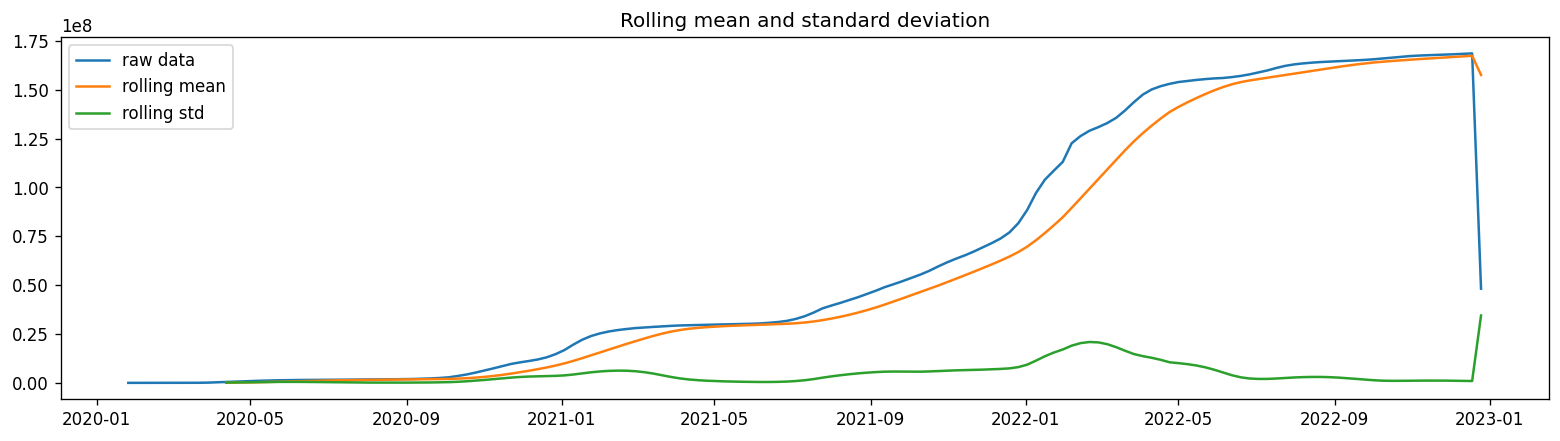

In [50]:
pd.options.display.float_format = '{:.8f}'.format
stationarity_test(y,'raw data')

After plotting the rolling statistics for the Time series data, from the resultant graph it can be observed as the rolling mean is incerasing with the increase in time and rolling standard deviation is constant with time. This indicates that the time series which we are analysing is not stationary.

* Augmented Dickey-Fuller Test:
The main reson behind conducting this test is to determing the stationarity. Here p-value <=0.05 then we can say that the null hypothesis is rejected and the data is stationary. If p-value >0.05 then it failed to reject the hypothesis and the data is not stationary.




In [51]:
# Augmented Dickey-Fuller Test
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [52]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -1.774
P-value = 0.394
Critical values :
	1%: -3.4744158894942156 - The data is not stationary with 99% confidence
	5%: -2.880878382771059 - The data is not stationary with 95% confidence
	10%: -2.577081275821236 - The data is not stationary with 90% confidence


From the output we can observe that the p-value > 0.05 and also the test statistic when compared to the critical values the test statistic value is greater. So the time series data which we used for analysis is not stationary.

* **Making the data stationary**

* Taking square root of the data: As the data for the Active cases are too large in numbers so taking square roo to those values.

In [53]:
df_sqrt=np.sqrt(timeseries_df_UK['Active'])
df_diff=df_sqrt.diff().dropna()
print(df_diff)

Date
2020-02-02       1.00000000
2020-02-09       6.48331477
2020-02-16       2.00351821
2020-02-23      -0.43144784
2020-03-01       7.64790795
                  ...      
2022-11-27       5.89410675
2022-12-04       6.50982137
2022-12-11       7.71893686
2022-12-18       9.03532765
2022-12-25   -6042.10604494
Freq: W-SUN, Name: Active, Length: 152, dtype: float64


In [54]:
# Using drop() function to delete last row
df_diff.drop(index=df_diff.index[-1],axis=0,inplace=True)
print(df_diff)
y = df_diff

Date
2020-02-02    1.00000000
2020-02-09    6.48331477
2020-02-16    2.00351821
2020-02-23   -0.43144784
2020-03-01    7.64790795
                 ...    
2022-11-20    6.49196359
2022-11-27    5.89410675
2022-12-04    6.50982137
2022-12-11    7.71893686
2022-12-18    9.03532765
Freq: W-SUN, Name: Active, Length: 151, dtype: float64


* Deseasonalising: It removes the underlying seasonaity from the time series. 

 > Is the de-seasonalized data stationary ?
Test statistic = -6.025
P-value = 0.000
Critical values :
	1%: -3.4756368462466662 - The data is  stationary with 99% confidence
	5%: -2.8814104466172608 - The data is  stationary with 95% confidence
	10%: -2.5773652982553568 - The data is  stationary with 90% confidence


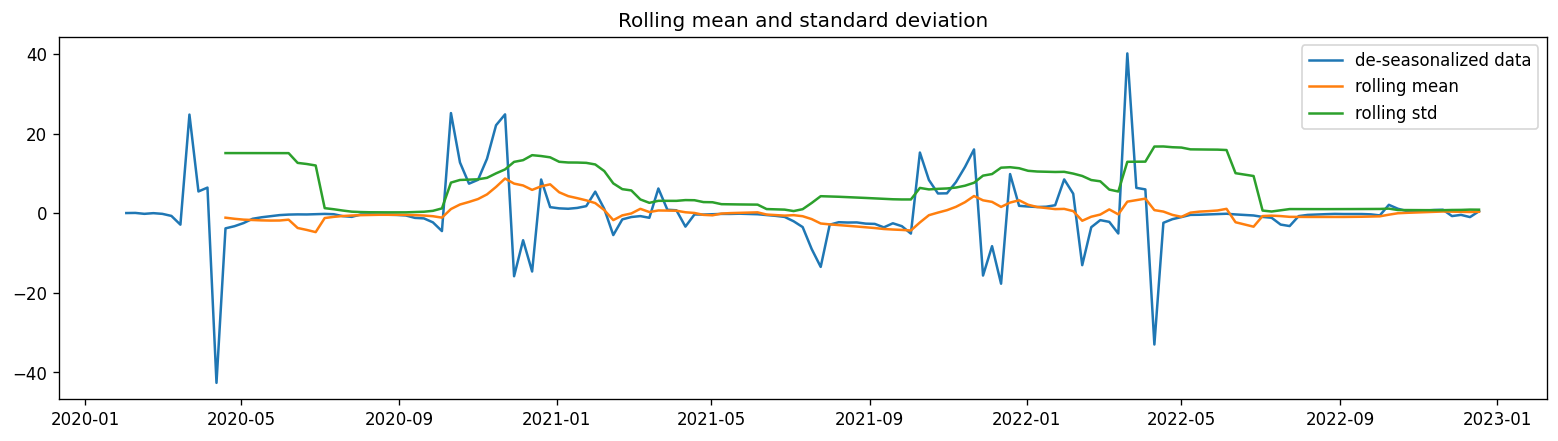

In [55]:
# Deseasonalize
result_add = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')
deseasonlize = y.values / result_add.seasonal
# rolling statistics test
stationarity_test(deseasonlize,'de-seasonalized data')
#ADF test
ADF_test(deseasonlize,'de-seasonalized data')

From the plots we can observe that the mean and standard deviation had become constant with time and the test statistic values are also greater than the critical calues. So we can conclude from this that the time series data had become stationary after removing the sesonal component

**ARIMA**:
ARIMA is an Auto Regressive Integrated Moving Average.
It is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values. ARIMA model accepts the non-sesasonal time series. So for this model we are removing the seasonality by taking the deseasonal time series which are computed above.

* Finding order of differencing(d) in ARIMA model: The purpose of differencing it to make the time series stationary.

But we need to be careful to not over-difference the series. Because, an over differenced series may still be non-stationary, which in turn will affect the model parameters.

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing.



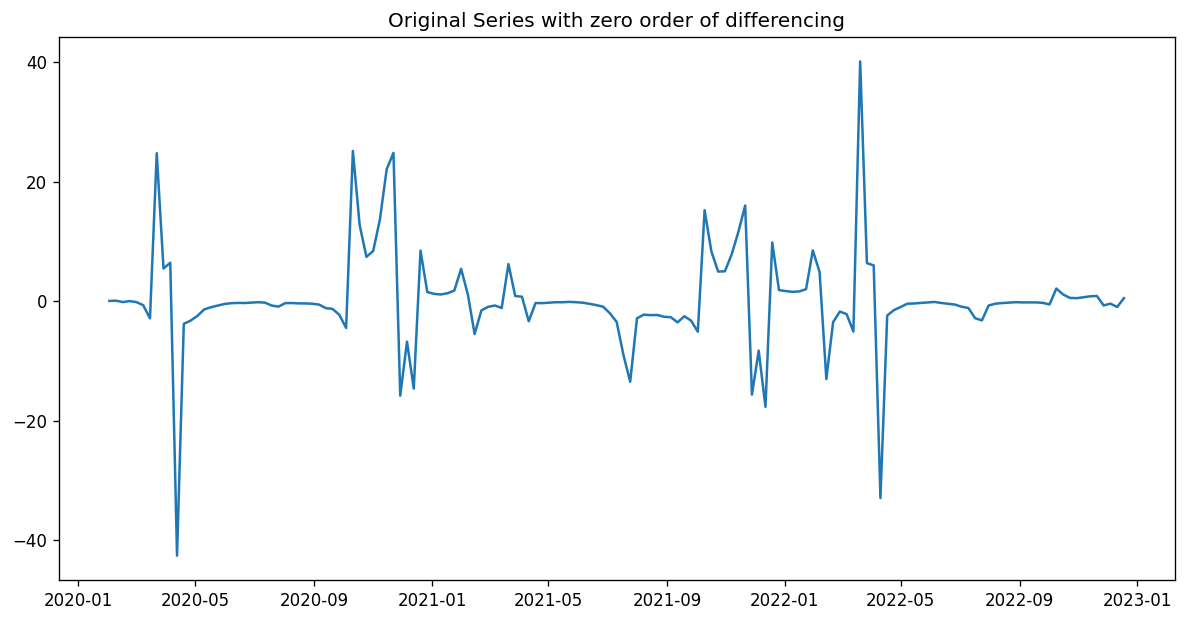

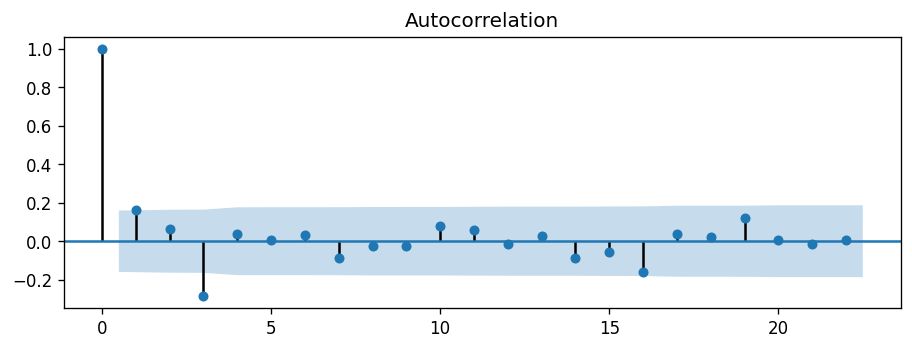

In [56]:
# Original Series
y_deseasonal = deseasonlize
plt.figure(figsize=(12, 6))
plt.plot(y_deseasonal)
plt.title('Original Series with zero order of differencing')
acf0 = plot_acf(y_deseasonal)

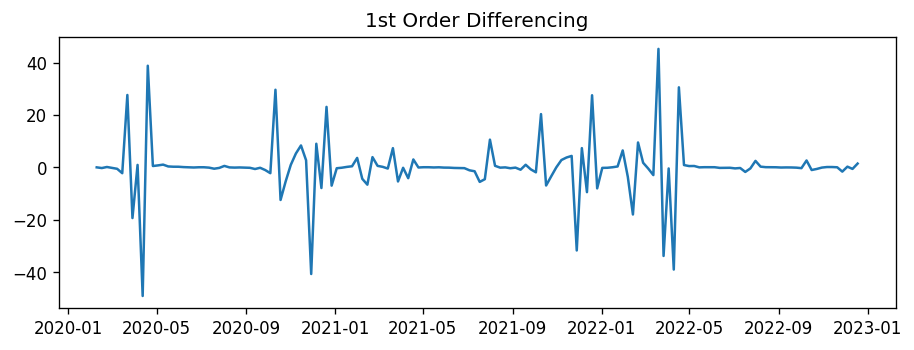

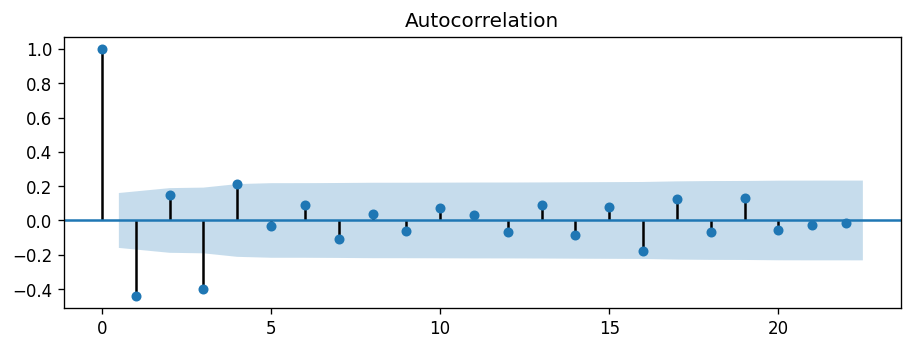

In [57]:
# 1st order Differencing
plt.plot(y_deseasonal.diff()); 
plt.title('1st Order Differencing')
acf1 = plot_acf(y_deseasonal.diff().dropna())


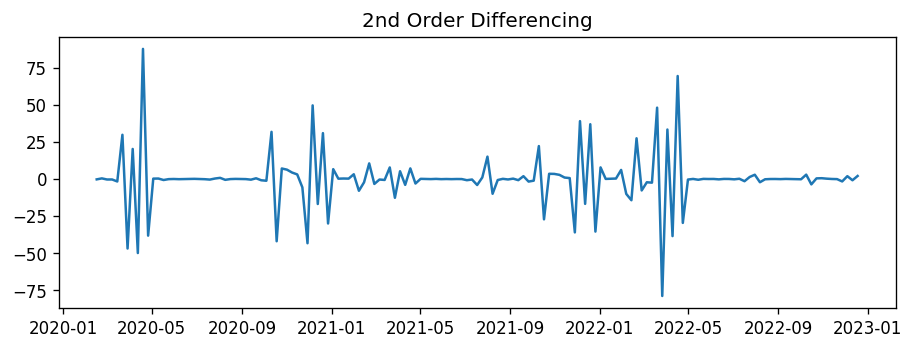

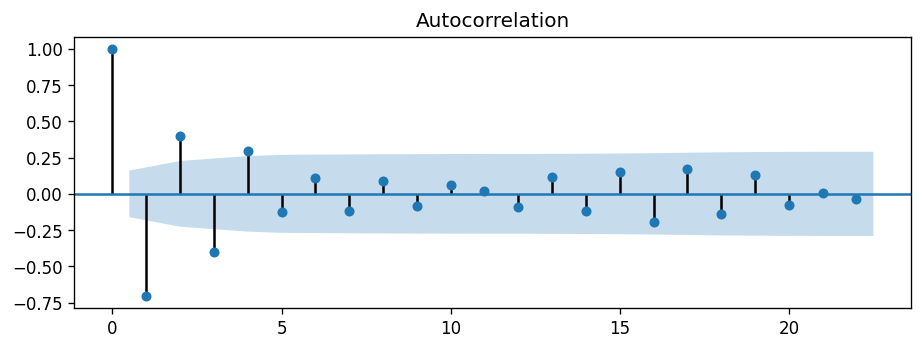

In [58]:
# 2nd order Differencing
plt.plot(y_deseasonal.diff().diff()); 
plt.title('2nd Order Differencing')
acf2 = plot_acf(y_deseasonal.diff().diff().dropna())

From the resultant plots we can observe that the ACF plot reaches to 0 at the zero order difference itself. So we are considering d value which is orderof diffrencing as d = 0 for this time series.

* Deternming AR(p)

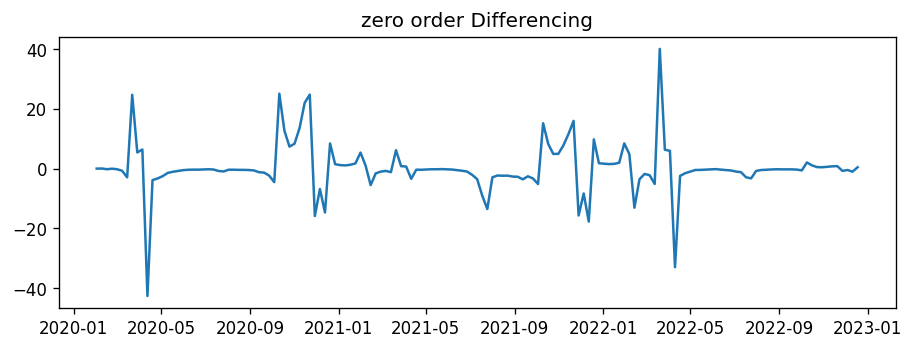

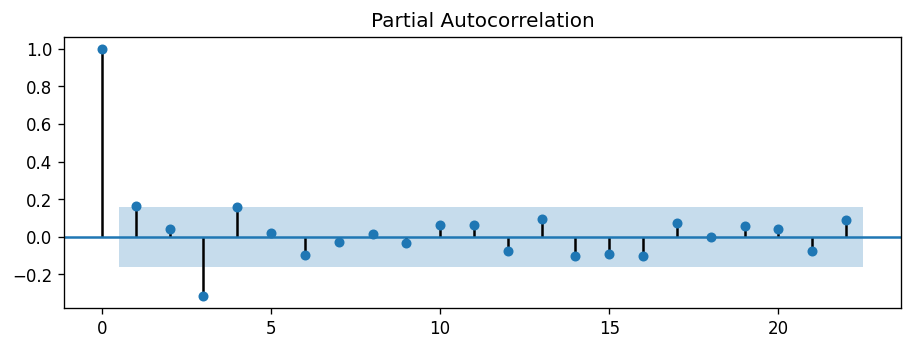

In [59]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plt.plot(y_deseasonal); 
plt.title('zero order Differencing')
pacf = plot_pacf(y_deseasonal.dropna())

* Determining MA(q)

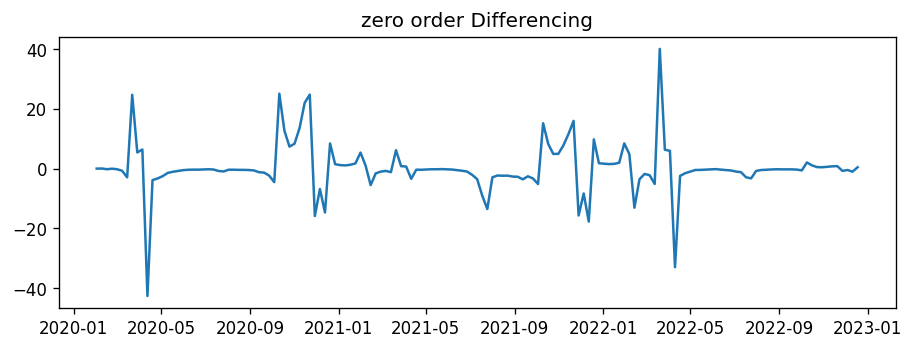

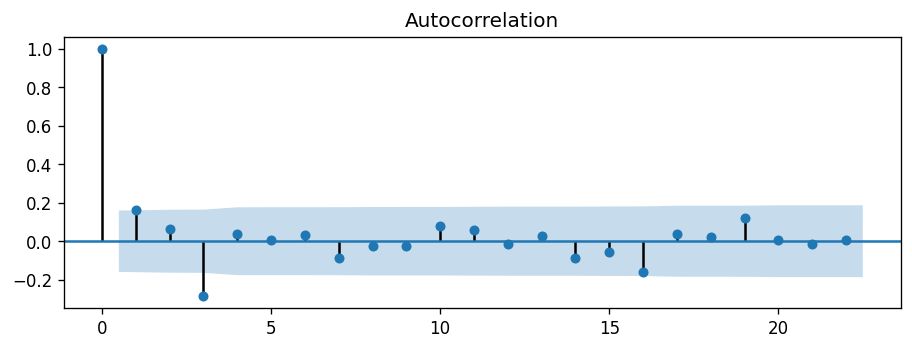

In [60]:
plt.plot(y_deseasonal); 
plt.title('zero order Differencing')
acf = plot_acf(y_deseasonal.dropna())

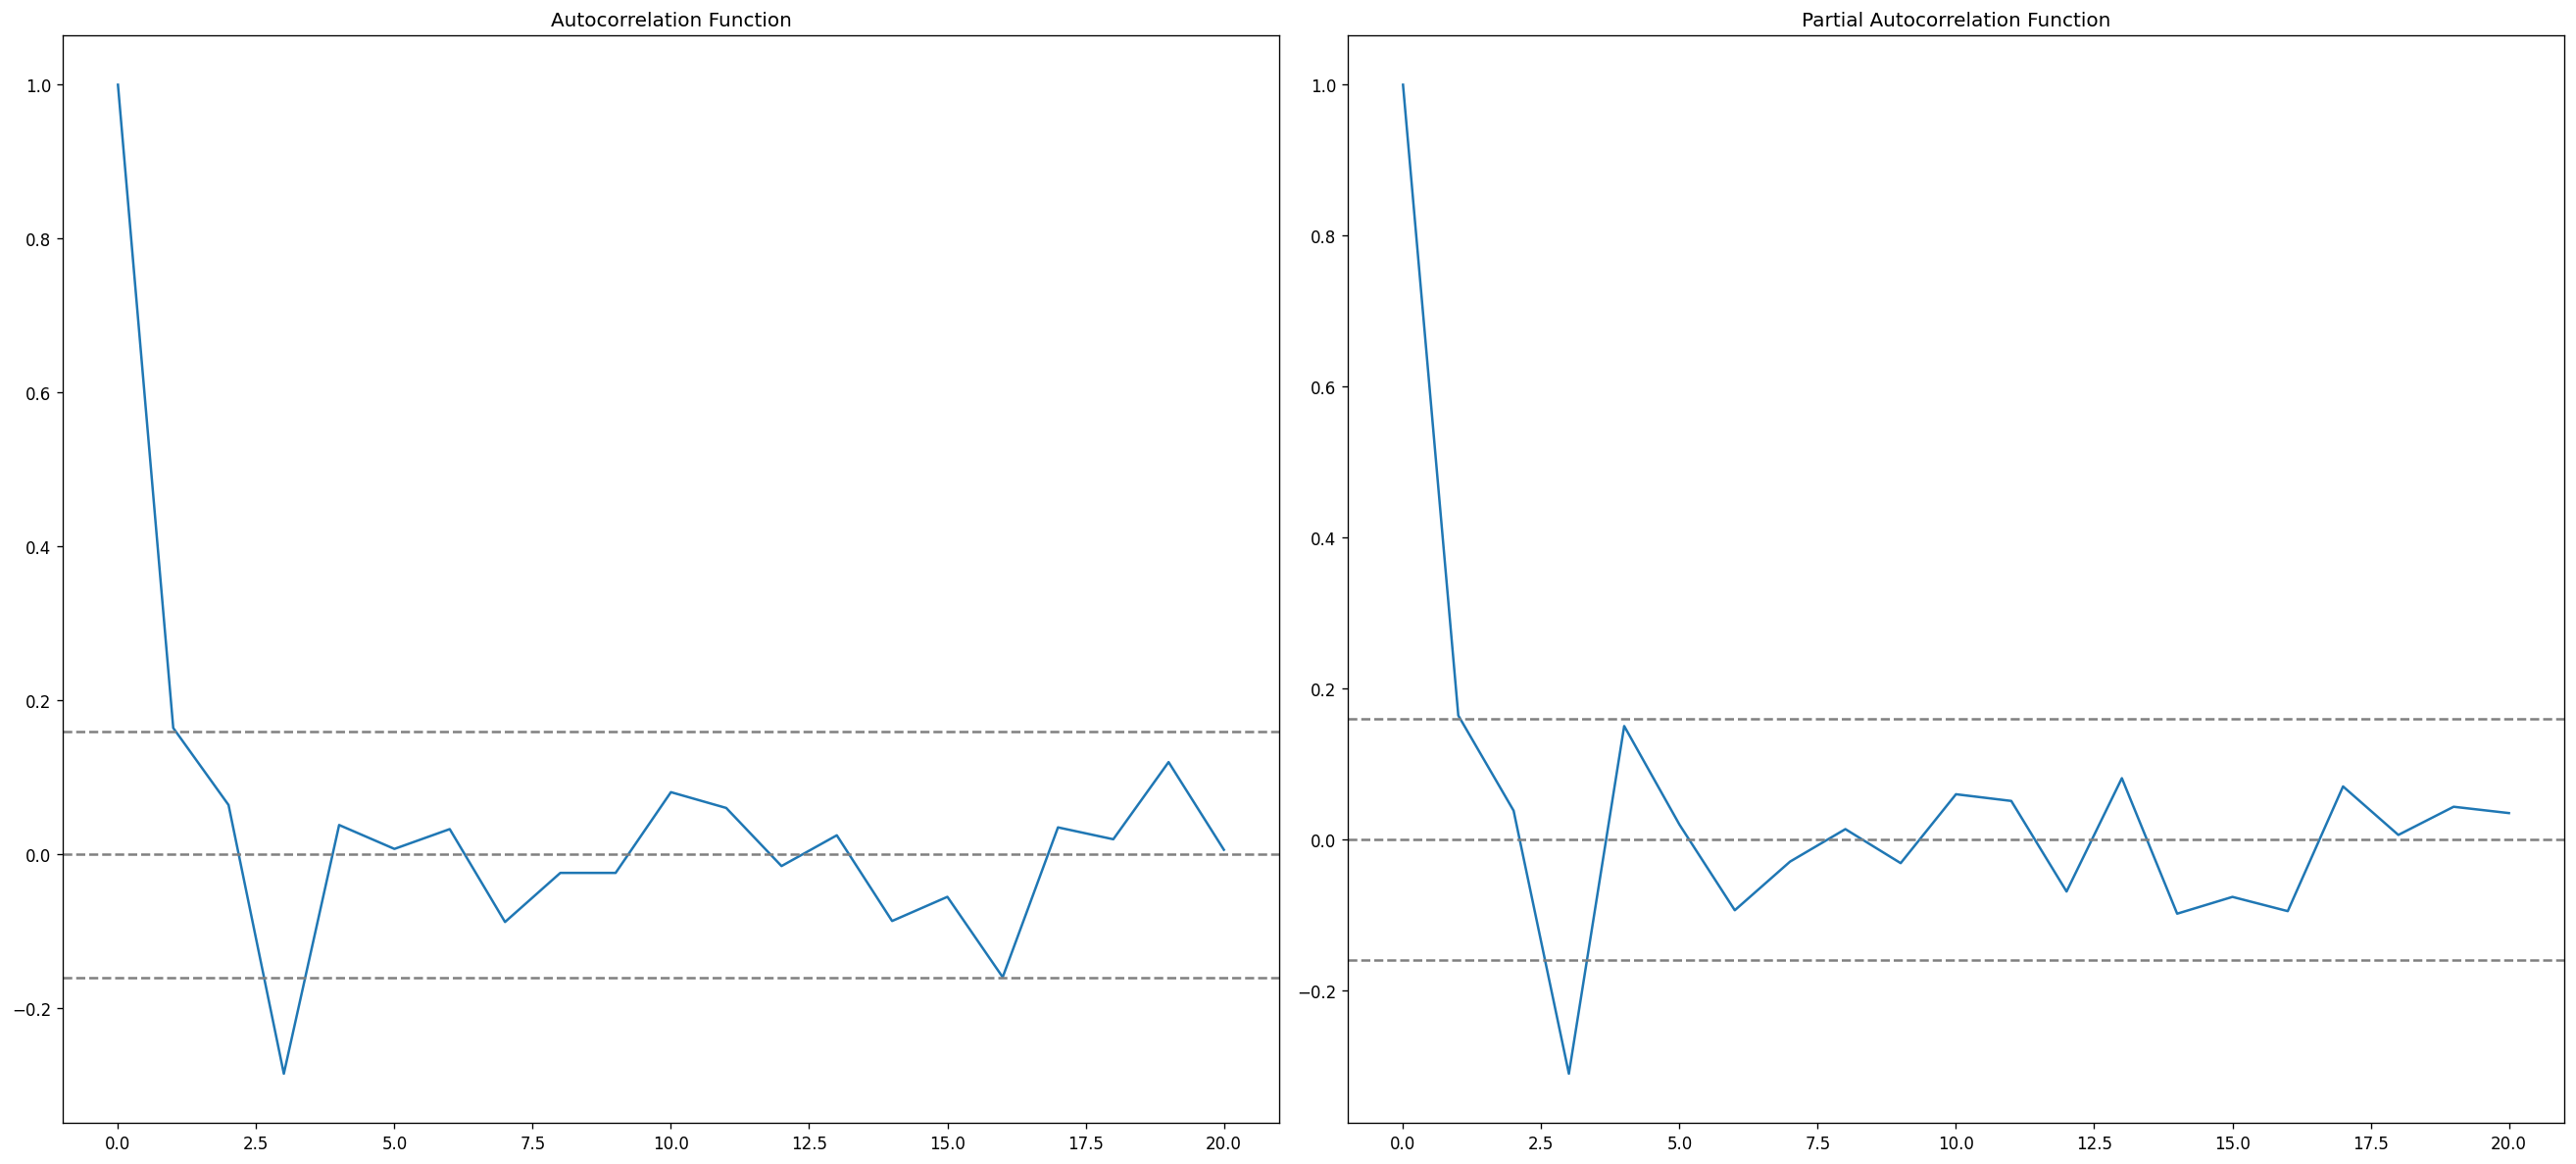

In [61]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(y_deseasonal, nlags=20)
lag_pacf = pacf(y_deseasonal, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_deseasonal)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_deseasonal)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y_deseasonal)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y_deseasonal)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values
Choosing p: The lag value where the PACF chart crosses the upper confidence interval for the first time which is close to 2. p=2.
Choosing q: The lag value where the ACF chart crosses the upper confidence interval for the first time which is close to 2. q=2.

In [62]:
model = ARIMA(y_deseasonal, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               seasonal   No. Observations:                  151
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -523.700
Date:                Tue, 17 Jan 2023   AIC                           1059.400
Time:                        07:45:55   BIC                           1077.503
Sample:                    02-02-2020   HQIC                          1066.754
                         - 12-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2203      1.069      0.206      0.837      -1.876       2.316
ar.L1         -0.6319      0.211     -2.990      0.003      -1.046      -0.218
ar.L2         -0.4019      0.191     -2.099      0.0

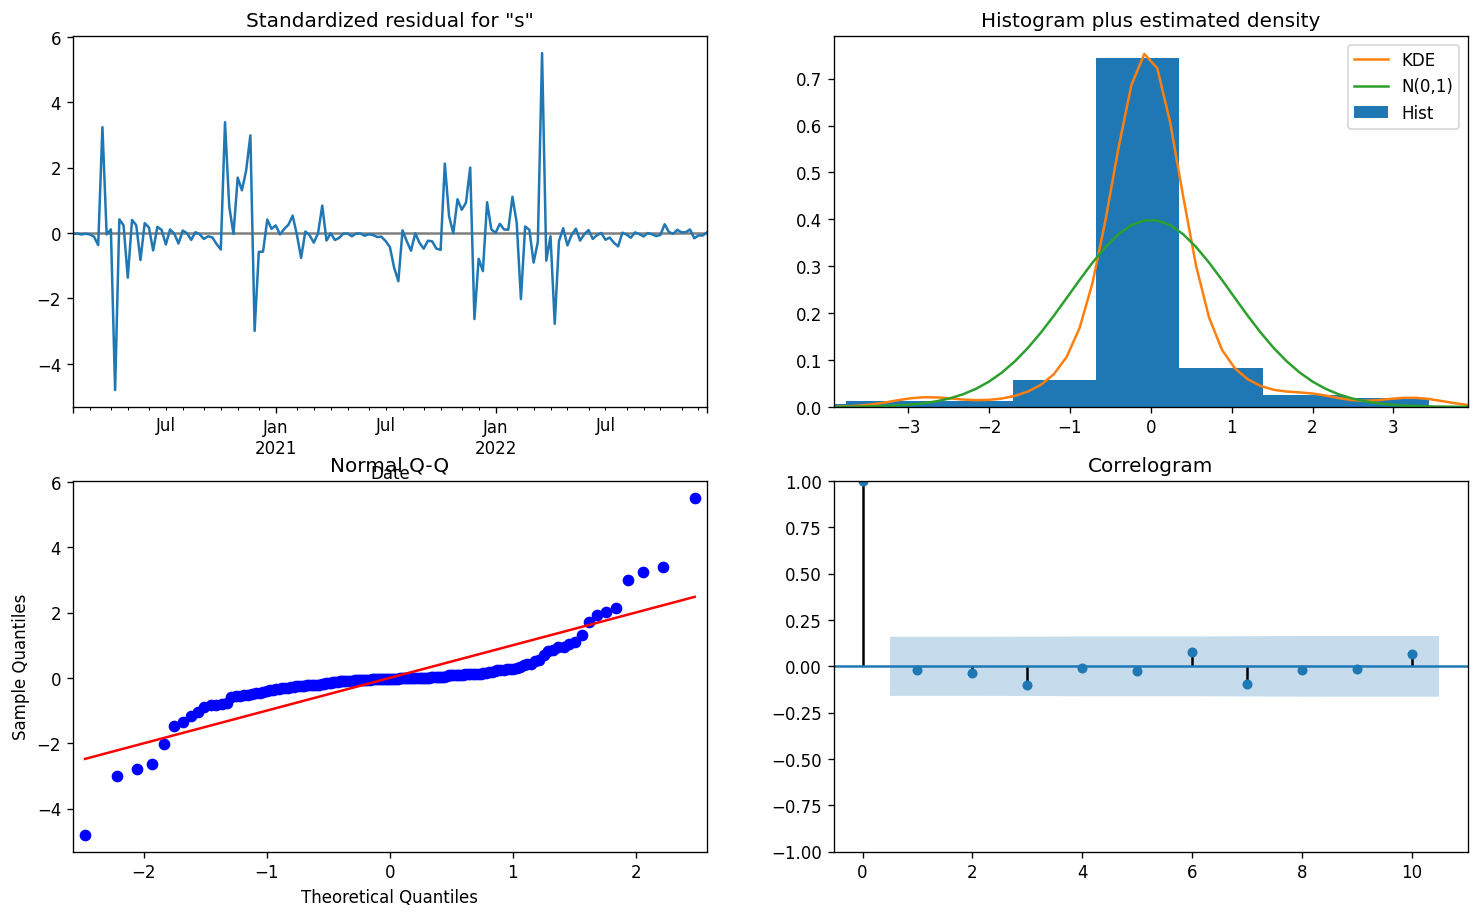

In [63]:
residuals_default = model_fit.plot_diagnostics(figsize=(15, 9))

* Forecasting with ARIMA model

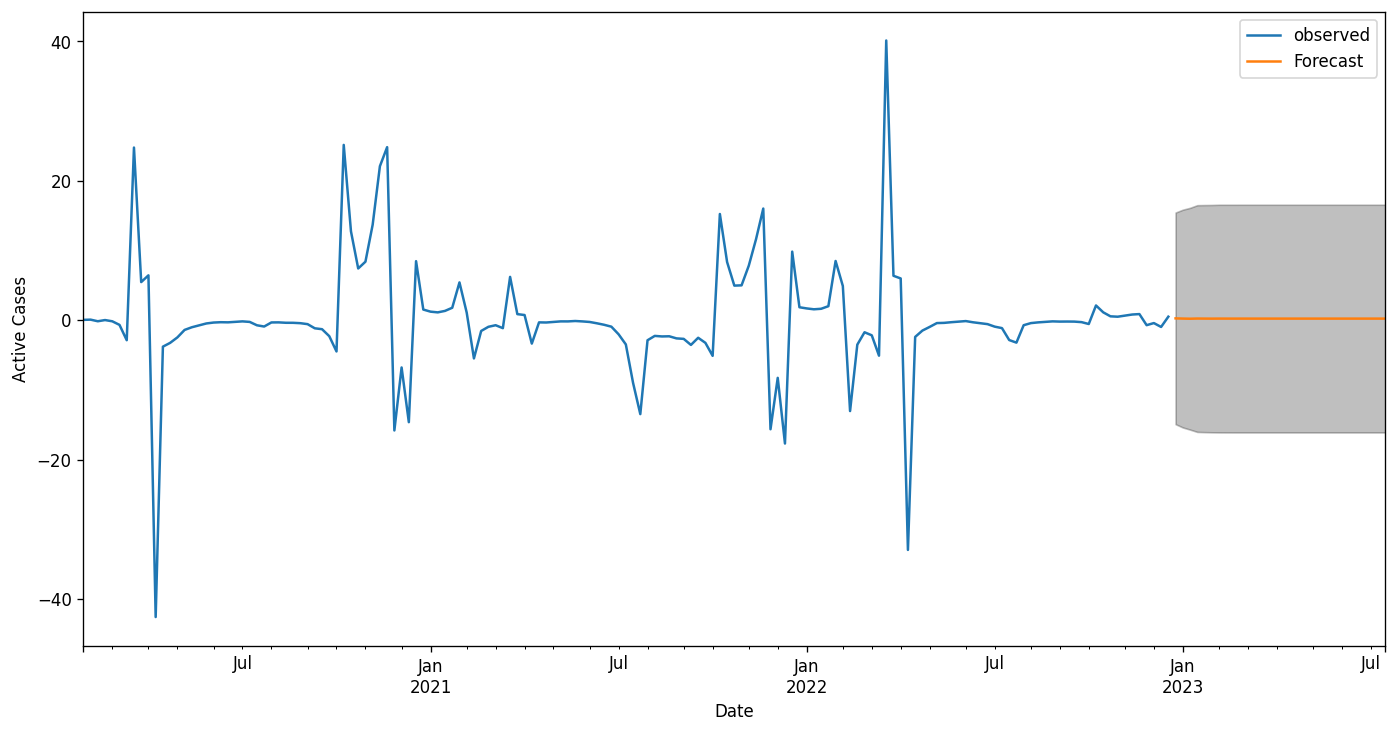

In [64]:
pred_uc = model_fit.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y_deseasonal.loc['2020-02-02':][:].plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Active Cases')
plt.legend()
plt.show()

In [65]:
# Produce the forcasted tables 
pm = pred_uc.predicted_mean.reset_index()
pm.columns = ['Date','Predicted_Mean']
pci = pred_ci.reset_index()
pci.columns = ['Date','Lower Bound','Upper Bound']
final_table = pm.join(pci.set_index('Date'), on='Date')
final_table

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-12-25,0.25499422,-14.92950011,15.43948855
1,2023-01-01,0.22424677,-15.40180636,15.85029990
2,2023-01-08,0.20380383,-15.70893091,16.11653856
3,2023-01-15,0.22907957,-16.03918787,16.49734701
4,2023-01-22,0.22132437,-16.07343840,16.51608713
5,2023-01-29,0.21606605,-16.09700044,16.52913254
6,2023-02-05,0.22250571,-16.11329291,16.55830433
7,2023-02-12,0.22054994,-16.11692269,16.55802257
8,2023-02-19,0.21919756,-16.11948055,16.55787567
9,2023-02-26,0.22083818,-16.11931307,16.56098942
